## What is inside

- Resampling, Cleaning, Missing Values

- Univariate forecasting

- ARIMA model = AR-Autoregressive, I- Differencing MA- Moving Average
    - Small AIC
    - Select P for AR, PACF plot
    - Select Q for MA, ACF plot
    - Select I
    - Plot one attirbute, see patterns: Cyclic, Seasonal, Trend
    - Seasonal decompose: Check Trend, Seasonality, Residual
    - Make Data Stationary: Log, Sqrt Transformation, Differencing.
    - Stationarity test: Adf test, Rolling Statistics
    - PACF plot, ACF plot correlations will disapper if data is stationary
    - Train model on selected P, Q, R
    - Perform Grid-Search and try to minimize AIC
    - Evaluate on Test-set(forecast), Calculate MSE
    - Any transformations that are applied must be reverted.
 
- Multivariate forecasting
    - Create separate ARIMA model for each observed feature(series)
    - VAR model: Cross Series Lagged
- Convert it as Supervised Learning Problem
- Neural Networks
    - RNN
    - LSTM
    - Last layer will give output

# Business Problem

New York City is arguably the taxi capital of America and home of the classic yellow taxicab. I am interested to work on yellow-taxi (medallion) demand prediction. They are the only vehicles that have the right to pick up street-hailing and prearranged passengers anywhere in New York City. Taxicabs are operated by private cab companies and licensed by the New York City Taxi and Limousine Commission (TLC).  They lease it to their drivers who in turn get to keep 100% of the fares and tips (some companies charge less for the lease, but retain a portion of the fares). These fares are set by the TLC, and the amount that a cab company can lease the vehicle to the driver is also set.
Ride-sharing services such as Uber and Lyft have disrupted the taxi industry. Uber has become hugely popular in New York, and its trips outpaced yellow taxis for the first time last year. The biggest problem with taxis is they are not easy to find. Riders might have to wait longer when demand exceeds supply. There are Currently there are about 13,500 medallion cabs in NYC. They may not fulfill all the demand but it is possible to improve their utilization.


The model can make real-time demand predictions. It can be deployed inside the cars. Drivers could go to a location where there is higher demand in the next hour. As drivers get more revenue, they will be less likely to move to Uber/Lyft.  Taxi cab companies could maintain their lease revenue for long period of time. If companies retain portion of the fares, they can work with the drivers to make a plan on how to deploy their taxis throughout the day to maximize profit.

## Phase 1: Inital Exploratory Data Analysis

The yellow and green taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#required for google colab
# mount google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#required for Google Colab
!pip install --upgrade statsmodels 
!pip install --upgrade pandas
!pip install --upgrade seaborn
!pip install squarify
!sudo apt-get install libsnappy-dev
!pip install snappy
!pip install python-snappy
!pip install fastparquet

    100% |████████████████████████████████| 7.4MB 4.1MB/s 
  Found existing installation: statsmodels 0.8.0
    Uninstalling statsmodels-0.8.0:
      Successfully uninstalled statsmodels-0.8.0


    100% |████████████████████████████████| 10.1MB 3.6MB/s 
fastai 1.0.51 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0


    100% |████████████████████████████████| 215kB 25.6MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  libsnappy-dev
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 27.2 kB of archives.
After this operation, 108 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsnappy-dev amd64 1.1.7-1 [27.2 kB]
Fetched 27.2 kB in 0s (92.9 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
import pickle
from scipy import stats
from dask.diagnostics import ProgressBar
from tabulate import tabulate
import dask.array as da
from dask.distributed import Client,progress
import calendar
import time
# for faster processing
import dask.multiprocessing
#dask.config.set(get=dask.multiprocessing.get)  # set processes as default

# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools

# Set notebook mode to work in offline
pyo.init_notebook_mode()

# tree map
import squarify
# converting int to month abbr
import calendar

# removes warnings when plotting time-series with seaborn
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# # conda install -c conda-forge graphviz
# # conda install -c conda-forge python-graphviz
# conda install -c conda-forge python-snappy 
#conda install -c conda-forge snappy 


# y2017_ddf.visualize()
# can't allocate memory


# enable plotly for google_colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


Output hidden; open in https://colab.research.google.com to view.

In [4]:
dask.config.set(scheduler='multiprocessing')

In [0]:
# # from dask.distributed import Client, progress
# # c = Client(processes=False)
# # c
# If you want to run workers in your same process you can pass the processes=False keyword argument. 
# set processes=False for Google colab
c = Client(processes=False)  # create processes and set as default

In [6]:
c

<Client: scheduler='inproc://172.28.0.2/479/1' processes=1 cores=2>

To prevent dask workers from dying I modified the four attributes in distributed.yaml

http://docs.dask.org/en/latest/dataframe-performance.html

nano ~/.config/dask/distributed.yaml

@Axel-CH I've also noticed a mismatch between the memory usage reported by dask distributed and the OS. What helped me to resolve problems of freezed and killed workers was to change the configuration described here to the following:

     # Fractions of worker memory at which we take action to avoid memory blowup
     # Set any of the lower three values to False to turn off the behavior entirely
     memory:
       target: 0.95  # target fraction to stay below
       spill: False  # fraction at which we spill to disk
       pause: False  # fraction at which we pause worker threads
       terminate: False  # fraction at which we terminate the worker
       
       
  distributed:
  worker:
    # Fractions of worker memory at which we take action to avoid memory blowup
    # Set any of the lower three values to False to turn off the behavior entirely
    memory:
      target: 0.60  # target fraction to stay below
      spill: 0.70  # fraction at which we spill to disk
      pause: 0.80  # fraction at which we pause worker threads
      terminate: 0.95  # fraction at which we terminate the worker

In [0]:
data_types_s = \
{
'VendorID': 'float64',
'tpep_pickup_datetime' :      'object',
'tpep_dropoff_datetime' :     'object',
'passenger_count' :          'float64',
'trip_distance' :           'float64',
'RatecodeID' :               'float64',
'store_and_fwd_flag' :        'object',
'PULocationID' :             'float64',
'DOLocationID' :             'float64',
'payment_type' :             'float64',
'fare_amount' :              'float64',
'extra' :                    'float64',
'mta_tax' :                  'float64',
'tip_amount' :               'float64',
'tolls_amount' :             'float64',
'improvement_surcharge' :    'float64',
'total_amount' :             'float64'
}

The data doesn't fit to memory so I have to load it as a dask dataframe. The dates are stored as strings. I had to parse them into date. Dask dataframe default parser is very slow and takes foreever to complete.

Positional indexing(iloc) and label indexing(loc) is not possible in Dask. Dask doesn't maintain indices or labels of the whole dataframe. It is not as simple as pandas iloc/loc. Trying loc on dask dataframe returns all datapoints from all paritions with the given label. Positional indexing can only be used to select columns, doesn't support row index.

In [0]:
# slow
# y2017 = dd.read_csv('2017_Yellow_Taxi_Trip_Data.csv', dtype=data_types_s, 
#                     parse_dates=["tpep_pickup_datetime","tpep_dropoff_datetime"])


In [0]:
#blocksize=25e6
y2017_ddf = dd.read_csv('2017_Yellow_Taxi_Trip_Data.csv', dtype=data_types_s)
y2018_ddf = dd.read_csv('2018_Yellow_Taxi_Trip_Data.csv', dtype=data_types_s)

The dask dataframe works on 165 partitions.

In [0]:
y2017_ddf.npartitions

165

In [0]:
y2018_ddf.npartitions

92

In [0]:
# head(n=5, npartitions=1, compute=True)- These are the default arguments
y2017_ddf.head()

VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  passenger_count  \
0       1.0  05/30/2017 03:34:55 PM  05/30/2017 03:47:48 PM              1.0   
1       1.0  05/30/2017 03:34:55 PM  05/30/2017 04:04:45 PM              1.0   
2       2.0  05/30/2017 03:34:55 PM  05/30/2017 03:47:16 PM              1.0   
3       2.0  05/30/2017 03:34:55 PM  05/30/2017 03:43:40 PM              5.0   
4       2.0  05/30/2017 03:34:55 PM  05/30/2017 03:55:39 PM              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N          68.0         234.0   
1           2.20         1.0                  N         186.0         229.0   
2           1.13         1.0                  N         231.0         125.0   
3           1.08         1.0                  N         161.0         170.0   
4           1.96         1.0                  N         239.0         236.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           2.0          9.0    0.0      0.5        0.00           0.0   
1           2.0         18.0    0.0      0.5        0.00           0.0   
2           1.0          9.0    0.0      0.5        2.45           0.0   
3           2.0          7.0    0.0      0.5        0.00           0.0   
4           1.0         14.0    0.0      0.5        2.00           0.0   

   improvement_surcharge  total_amount  
0                    0.3          9.80  
1                    0.3         18.80  
2                    0.3         12.25  
3                    0.3          7.80  
4                    0.3         16.80

In [0]:
# head(n=5, npartitions=1, compute=True)- These are the default arguments
y2018_ddf.head(5)

VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  passenger_count  \
0       2.0  11/04/2084 12:32:24 PM  11/04/2084 12:47:41 PM              1.0   
1       2.0  11/04/2084 12:32:24 PM  11/04/2084 12:47:41 PM              1.0   
2       2.0  11/04/2084 12:25:53 PM  11/04/2084 12:29:00 PM              1.0   
3       2.0  11/04/2084 12:25:53 PM  11/04/2084 12:29:00 PM              1.0   
4       2.0  11/04/2084 12:08:33 PM  11/04/2084 12:22:24 PM              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.34         1.0                  N         238.0         236.0   
1           1.34         1.0                  N         238.0         236.0   
2           0.32         1.0                  N         238.0         238.0   
3           0.32         1.0                  N         238.0         238.0   
4           1.85         1.0                  N         236.0         238.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           2.0         10.0    0.0      0.5         0.0           0.0   
1           2.0         10.0    0.0      0.5         0.0           0.0   
2           2.0          4.0    0.0      0.5         0.0           0.0   
3           2.0          4.0    0.0      0.5         0.0           0.0   
4           2.0         10.0    0.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  
0                    0.3          10.8  
1                    0.3          10.8  
2                    0.3           4.8  
3                    0.3           4.8  
4                    0.3          10.8

The above is the head of the first parition of the dataframe. It is not neccessarily the head of the whole dataframe. The same for tail. If npartitions is maximum(165 or 92  for this example). It is possible to get the head and tail of the whole dataframe. It is not fast though. Becauae it has to go over all the data points

In [0]:
y2017_ddf.tail()

VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
392174       1.0  05/30/2017 03:34:54 PM  05/30/2017 03:40:40 PM   
392175       2.0  05/30/2017 03:34:54 PM  05/30/2017 04:07:09 PM   
392176       2.0  05/30/2017 03:34:54 PM  05/30/2017 03:46:10 PM   
392177       2.0  05/30/2017 03:34:54 PM  05/30/2017 03:48:26 PM   
392178       1.0  05/30/2017 03:34:55 PM  05/30/2017 03:47:02 PM   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
392174              1.0           1.20         1.0                  N   
392175              1.0           2.77         1.0                  N   
392176              1.0           1.01         1.0                  N   
392177              1.0           1.96         1.0                  N   
392178              1.0           1.30         1.0                  N   

        PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
392174          24.0         239.0           2.0          6.0    0.0      0.5   
392175         236.0         163.0           1.0         20.0    0.0      0.5   
392176         236.0         236.0           1.0          8.0    0.0      0.5   
392177         100.0         107.0           1.0         10.0    0.0      0.5   
392178         142.0         237.0           1.0          9.0    0.0      0.5   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  
392174        0.00           0.0                    0.3          6.80  
392175        3.00           0.0                    0.3         23.80  
392176        1.32           0.0                    0.3         10.12  
392177        2.16           0.0                    0.3         12.96  
392178        1.00           0.0                    0.3         10.80

### Data Dictionary

In [0]:
y2017_ddf.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID             float64
DOLocationID             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

The y2017 data has 113M rows. Object types take larger memory space than floats. I discovered that changing that parsing the dates could enable loading the data to memory. Pandas is faster than Dask if data can be loaded to memory. I spent so much time trying to groupby the data without parsing the dates. The process was taking all the memory space and eventually kernel was dying.

In [0]:
features = list(y2017_ddf.columns)
# read a text file containing descriptions
with open("taxi_data/feature_desc.txt", "r") as f:
    description = f.readlines()
description = "".join(description)

In [0]:
df = {"features": list(y2017_ddf.columns), "description": description.strip().split('9')}
print(tabulate(df, headers='keys', tablefmt='psql'))

+-----------------------+------------------------------------------------------------------------------------------------------+
| features              | description                                                                                          |
|-----------------------+------------------------------------------------------------------------------------------------------|
| VendorID              | A code indicating the TPEP provider that provided the record                                         |
| tpep_pickup_datetime  | The date and time when the meter was engaged                                                         |
| tpep_dropoff_datetime | The date and time when the meter was disengaged                                                      |
| passenger_count       | The number of passengers in the vehicle                                                              |
| trip_distance         | The elapsed trip distance in miles reported by the taximeter           

### Parse Dates

In [0]:
# y2017_ddf = y2017_ddf.drop("store_and_fwd_flag", axis=1)
# y2018_ddf = y2018_ddf.drop("store_and_fwd_flag", axis=1)

In [0]:
meta_all = \
{
'VendorID': 'float64',
'tpep_pickup_datetime' :      'datetime64[ns]',
'tpep_dropoff_datetime' :     'datetime64[ns]',
'passenger_count' :          'float64',
'trip_distance' :           'float64',
'RatecodeID' :               'float64',
'store_and_fwd_flag' :        'object',
'PULocationID' :             'float64',
'DOLocationID' :             'float64',
'payment_type' :             'float64',
'fare_amount' :              'float64',
'extra' :                    'float64',
'mta_tax' :                  'float64',
'tip_amount' :               'float64',
'tolls_amount' :             'float64',
'improvement_surcharge' :    'float64',
'total_amount' :             'float64'
}

In [0]:
# parse dates
# convert string to numpy date type
def parse_dates(df):
    df = df.assign(tpep_pickup_datetime=pd.to_datetime(df['tpep_pickup_datetime'], format="%m/%d/%Y %I:%M:%S %p"))
    df = df.assign(tpep_dropoff_datetime=pd.to_datetime(df['tpep_dropoff_datetime'], format="%m/%d/%Y %I:%M:%S %p"))
    return df
             
# map_partition applies a function to each partition
# delayed
y2017_ddf = y2017_ddf.map_partitions(parse_dates, meta=meta_all)
y2018_ddf = y2018_ddf.map_partitions(parse_dates, meta=meta_all)

In [0]:
y2017_ddf.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       1.0  2017-05-30 15:34:55   2017-05-30 15:47:48              1.0   
1       1.0  2017-05-30 15:34:55   2017-05-30 16:04:45              1.0   
2       2.0  2017-05-30 15:34:55   2017-05-30 15:47:16              1.0   
3       2.0  2017-05-30 15:34:55   2017-05-30 15:43:40              5.0   
4       2.0  2017-05-30 15:34:55   2017-05-30 15:55:39              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.30         1.0                  N          68.0         234.0   
1           2.20         1.0                  N         186.0         229.0   
2           1.13         1.0                  N         231.0         125.0   
3           1.08         1.0                  N         161.0         170.0   
4           1.96         1.0                  N         239.0         236.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           2.0          9.0    0.0      0.5        0.00           0.0   
1           2.0         18.0    0.0      0.5        0.00           0.0   
2           1.0          9.0    0.0      0.5        2.45           0.0   
3           2.0          7.0    0.0      0.5        0.00           0.0   
4           1.0         14.0    0.0      0.5        2.00           0.0   

   improvement_surcharge  total_amount  
0                    0.3          9.80  
1                    0.3         18.80  
2                    0.3         12.25  
3                    0.3          7.80  
4                    0.3         16.80

In [0]:
y2018_ddf.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2084-11-04 12:32:24   2084-11-04 12:47:41              1.0   
1       2.0  2084-11-04 12:32:24   2084-11-04 12:47:41              1.0   
2       2.0  2084-11-04 12:25:53   2084-11-04 12:29:00              1.0   
3       2.0  2084-11-04 12:25:53   2084-11-04 12:29:00              1.0   
4       2.0  2084-11-04 12:08:33   2084-11-04 12:22:24              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.34         1.0                  N         238.0         236.0   
1           1.34         1.0                  N         238.0         236.0   
2           0.32         1.0                  N         238.0         238.0   
3           0.32         1.0                  N         238.0         238.0   
4           1.85         1.0                  N         236.0         238.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           2.0         10.0    0.0      0.5         0.0           0.0   
1           2.0         10.0    0.0      0.5         0.0           0.0   
2           2.0          4.0    0.0      0.5         0.0           0.0   
3           2.0          4.0    0.0      0.5         0.0           0.0   
4           2.0         10.0    0.0      0.5         0.0           0.0   

   improvement_surcharge  total_amount  
0                    0.3          10.8  
1                    0.3          10.8  
2                    0.3           4.8  
3                    0.3           4.8  
4                    0.3          10.8

### Erroneous Dates

The data contains incorrect years. To the minimum all pickup dates shall be either 2017 or 2018.

In [0]:
y2017_ddf[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].max().compute()

tpep_pickup_datetime    2053-03-21 16:47:33
tpep_dropoff_datetime   2053-03-21 16:52:21
dtype: datetime64[ns]

In [0]:
y2017_ddf[["tpep_pickup_datetime", "tpep_dropoff_datetime"]].min().compute()

tpep_pickup_datetime    2001-01-01 00:04:13
tpep_dropoff_datetime   1997-07-22 15:30:46
dtype: datetime64[ns]

In [0]:
wrong_dates = y2017_ddf.query("(tpep_pickup_datetime.dt.year != 2017) | (tpep_dropoff_datetime.dt.year != 2017)").compute()

In [0]:
len(wrong_dates)

1896

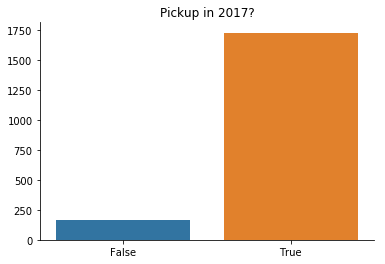

In [0]:
counts = (wrong_dates.tpep_pickup_datetime.dt.year == 2017).value_counts()
sns.barplot(counts.index, counts.values)
plt.title("Pickup in 2017?")
sns.despine()

Except few data points, wrong_dates contains pickup dates in 2017.

In [0]:
# end of 2017, beginning of 2018
print(len(wrong_dates.query('20171231 <= tpep_pickup_datetime <= 20180101')))
wrong_dates.query('20171231 <= tpep_pickup_datetime <= 20180101').head()

1723


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
275299       2.0  2017-12-31 00:20:00   2018-01-01 00:12:02              1.0   
276211       2.0  2017-12-31 00:02:57   2018-01-01 00:00:57              1.0   
277113       2.0  2017-12-31 00:37:57   2018-01-01 00:01:23              1.0   
277867       2.0  2017-12-31 00:05:27   2018-01-01 00:01:03              1.0   
278256       2.0  2017-12-31 00:32:47   2018-01-01 00:11:31              3.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
275299           4.23         1.0                  N         106.0   
276211           2.29         1.0                  N          79.0   
277113           0.36         1.0                  N          48.0   
277867           1.08         1.0                  N          79.0   
278256           1.43         1.0                  N         231.0   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
275299          14.0           2.0         15.5    0.5      0.5        0.00   
276211         261.0           1.0         10.5    0.5      0.5        1.18   
277113         230.0           2.0          5.0    0.5      0.5        0.00   
277867         148.0           1.0          6.5    0.5      0.5        0.00   
278256         114.0           2.0          6.0    0.5      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  
275299           0.0                    0.3         16.80  
276211           0.0                    0.3         12.98  
277113           0.0                    0.3          6.30  
277867           0.0                    0.3          7.80  
278256           0.0                    0.3          7.30

Out of 1896 mistakes, 1723 of them are actually trips starting in the end of 2017 and ending in 2018. So the data contans only 1896 -  1723 = 173 errors

Find those entries with same year and month but different year

In [0]:
query_str = \
"(tpep_pickup_datetime.dt.year == tpep_dropoff_datetime.dt.year) & \
(tpep_pickup_datetime.dt.month == tpep_dropoff_datetime.dt.month) & \
(tpep_pickup_datetime.dt.year != 2017)"
same_month_year = wrong_dates.query(query_str)
print(len(same_month_year))
same_month_year.head()

160


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
46116        2.0  2009-01-01 00:19:39   2009-01-01 01:14:02              1.0   
128504       2.0  2008-12-31 23:34:04   2008-12-31 23:39:41              1.0   
11038        2.0  2009-01-01 00:22:33   2009-01-01 00:43:50              1.0   
37675        2.0  2009-01-01 02:04:37   2009-01-01 02:38:12              1.0   
37676        2.0  2009-01-01 02:46:05   2009-01-01 02:57:58              1.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
46116           14.00         1.0                  N         132.0   
128504           0.93         1.0                  N         237.0   
11038            6.91         1.0                  N          41.0   
37675           10.69         1.0                  N         138.0   
37676            1.65         1.0                  N         230.0   

        DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
46116          181.0           2.0         44.5    1.0      0.5        0.00   
128504         140.0           2.0          5.5    0.0      0.5        0.00   
11038          138.0           1.0         23.5    0.0      0.5        6.01   
37675          230.0           2.0         34.5    0.0      0.5        0.00   
37676          246.0           2.0          9.5    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  
46116           0.00                    0.3         46.30  
128504          0.00                    0.3          6.30  
11038           5.76                    0.3         36.07  
37675           5.76                    0.3         41.06  
37676           0.00                    0.3         10.30

I could simply change these to 2017. But there is no way to be sure. Deleting 173 data points out of 113M doesn't affect the data very much.

Dask dataframe is much faster when it is indexed by date. Because it can sort the dates and partition the data by date ranges. During processing, Dask is not required to check all partitions which makes it efficient. Removing dates that are out of range will balance number of data points in the partitions. Otherwise some partitions will have few datapoints while others contain too many.

In [0]:
# remove erroneous dates from y2017
y2017_ddf = y2017_ddf.query("tpep_pickup_datetime.dt.year == 2017")
# remove erroneous dates from y2018
y2018_ddf = y2018_ddf.query("tpep_pickup_datetime.dt.year == 2018")

In [0]:
# don't drop pickup_datetime. It may be required to calculate durations, speed
y2017_ddf_final = y2017_ddf.set_index("tpep_pickup_datetime")
y2018_ddf_final = y2018_ddf.set_index("tpep_pickup_datetime")

In [0]:
y2017_ddf_final.head()

VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2017-01-01 00:00:00        2.0   2017-01-01 00:00:00              1.0   
2017-01-01 00:00:02        1.0   2017-01-01 00:03:50              1.0   
2017-01-01 00:00:02        2.0   2017-01-01 00:39:22              4.0   
2017-01-01 00:00:03        1.0   2017-01-01 00:06:58              1.0   
2017-01-01 00:00:05        1.0   2017-01-01 00:08:33              2.0   

                      trip_distance  RatecodeID store_and_fwd_flag  \
tpep_pickup_datetime                                                 
2017-01-01 00:00:00            0.02         2.0                  N   
2017-01-01 00:00:02            0.50         1.0                  N   
2017-01-01 00:00:02            7.75         1.0                  N   
2017-01-01 00:00:03            0.80         1.0                  N   
2017-01-01 00:00:05            0.90         1.0                  N   

                      PULocationID  DOLocationID  payment_type  fare_amount  \
tpep_pickup_datetime                                                          
2017-01-01 00:00:00          249.0         234.0           2.0         52.0   
2017-01-01 00:00:02           48.0          48.0           2.0          4.0   
2017-01-01 00:00:02          186.0          36.0           1.0         22.0   
2017-01-01 00:00:03          162.0         161.0           1.0          6.0   
2017-01-01 00:00:05           48.0          50.0           1.0          7.0   

                      extra  mta_tax  tip_amount  tolls_amount  \
tpep_pickup_datetime                                             
2017-01-01 00:00:00     0.0      0.5        0.00           0.0   
2017-01-01 00:00:02     0.5      0.5        0.00           0.0   
2017-01-01 00:00:02     0.5      0.5        4.66           0.0   
2017-01-01 00:00:03     0.5      0.5        1.45           0.0   
2017-01-01 00:00:05     0.5      0.5        0.00           0.0   

                      improvement_surcharge  total_amount  
tpep_pickup_datetime                                       
2017-01-01 00:00:00                     0.3         52.80  
2017-01-01 00:00:02                     0.3          5.30  
2017-01-01 00:00:02                     0.3         27.96  
2017-01-01 00:00:03                     0.3          8.75  
2017-01-01 00:00:05                     0.3          8.30

In [0]:
y2018_ddf_final.head()

VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2018-01-01 00:00:00        2.0   2018-01-01 00:00:00              1.0   
2018-01-01 00:00:02        2.0   2018-01-01 00:08:48              1.0   
2018-01-01 00:00:03        1.0   2018-01-01 00:21:06              1.0   
2018-01-01 00:00:03        2.0   2018-01-01 00:03:52              3.0   
2018-01-01 00:00:04        2.0   2018-01-01 00:08:13              1.0   

                      trip_distance  RatecodeID store_and_fwd_flag  \
tpep_pickup_datetime                                                 
2018-01-01 00:00:00            9.14         1.0                  N   
2018-01-01 00:00:02            1.36         1.0                  N   
2018-01-01 00:00:03            6.10         1.0                  N   
2018-01-01 00:00:03            0.99         1.0                  N   
2018-01-01 00:00:04            1.59         1.0                  N   

                      PULocationID  DOLocationID  payment_type  fare_amount  \
tpep_pickup_datetime                                                          
2018-01-01 00:00:00          229.0          17.0           2.0         27.0   
2018-01-01 00:00:02           68.0         249.0           2.0          7.5   
2018-01-01 00:00:03          255.0         236.0           2.0         20.5   
2018-01-01 00:00:03          236.0          43.0           2.0          5.5   
2018-01-01 00:00:04          141.0         161.0           2.0          8.0   

                      extra  mta_tax  tip_amount  tolls_amount  \
tpep_pickup_datetime                                             
2018-01-01 00:00:00     0.0      0.5         0.0           0.0   
2018-01-01 00:00:02     0.5      0.5         0.0           0.0   
2018-01-01 00:00:03     0.5      0.5         0.0           0.0   
2018-01-01 00:00:03     0.5      0.5         0.0           0.0   
2018-01-01 00:00:04     0.5      0.5         0.0           0.0   

                      improvement_surcharge  total_amount  
tpep_pickup_datetime                                       
2018-01-01 00:00:00                     0.3          27.8  
2018-01-01 00:00:02                     0.3           8.8  
2018-01-01 00:00:03                     0.3          21.8  
2018-01-01 00:00:03                     0.3           6.8  
2018-01-01 00:00:04                     0.3           9.3

#### Save as Parquet

Saving a dask dataframe as parquet relieves memory burden by efficiently storing computed results to disk. 

In [0]:
# save to disk
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y2017_ddf_final.to_parquet("taxi_data/y2017_ddf_final.parquet", engine="fastparquet")
    y2018_ddf_final.to_parquet("taxi_data/y2018_ddf_final.parquet", engine="fastparquet")

## Phase 2: EDA: Analysing Locations and Time Interval

In [0]:
# load data

# directory structure of the mounted drive(for google colab)
directory_in_str = "/content/drive/My Drive/taxi_data/"

# load from disk
import warnings
with warnings.catch_warnings():
    y2017_ddf_final = dd.read_parquet("taxi_data/y2017_ddf_final.parquet")
    y2018_ddf_final = dd.read_parquet("taxi_data/y2018_ddf_final.parquet")

## A. Time Interval of Partitions

In [0]:
y2017_ddf_final.columns

Index(['VendorID', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

The dataframe is sorted and divided by timestamps. The average duration of one partition is 2 days

In [0]:
y2017_ddf_final.divisions[:5]

(Timestamp('2017-01-01 00:00:00'),
 Timestamp('2017-01-03 14:50:19'),
 Timestamp('2017-01-05 21:55:12'),
 Timestamp('2017-01-07 21:21:32'),
 Timestamp('2017-01-10 09:59:19'))

In [0]:
# new dataframe
divs_df_2017 = pd.DataFrame()
divs_df_2017["division"] = y2017_ddf_final.divisions
# shifting back by one
divs_df_2017["prev_division"] = divs_df_2017.division.shift(1)
# find difference
divs_df_2017["difference"] = (divs_df_2017.division - divs_df_2017.prev_division)
# drop the null on the top
divs_df_2017.dropna(inplace=True)

# Only days, seconds and microseconds are stored internally. So astype with minute or hour is not supported
in_seconds = (divs_df_2017.division - divs_df_2017.prev_division).astype('timedelta64[s]')
# convert to hours and round it the nearest integer
divs_df_2017["difference(hours)"] = (in_seconds/3600.).map(np.round)
divs_df_2017.head()

division       prev_division      difference  difference(hours)
1 2017-01-03 14:50:19 2017-01-01 00:00:00 2 days 14:50:19               63.0
2 2017-01-05 21:55:12 2017-01-03 14:50:19 2 days 07:04:53               55.0
3 2017-01-07 21:21:32 2017-01-05 21:55:12 1 days 23:26:20               47.0
4 2017-01-10 09:59:19 2017-01-07 21:21:32 2 days 12:37:47               61.0
5 2017-01-12 15:21:23 2017-01-10 09:59:19 2 days 05:22:04               53.0

In [0]:
# do the same for 2018
divs_df_2018 = pd.DataFrame()
divs_df_2018["division"] = y2018_ddf_final.divisions
divs_df_2018["prev_division"] = divs_df_2018.division.shift(1)
divs_df_2018["difference"] = (divs_df_2018.division - divs_df_2018.prev_division)
divs_df_2018.dropna(inplace=True)

in_seconds = (divs_df_2018.division - divs_df_2018.prev_division).astype('timedelta64[s]')
divs_df_2018["difference(hours)"] = (in_seconds/3600.).map(np.round)
divs_df_2018.tail(5)

division       prev_division        difference  \
88 2018-06-21 09:42:44 2018-06-19 01:44:01   2 days 07:58:43   
89 2018-06-23 14:53:44 2018-06-21 09:42:44   2 days 05:11:00   
90 2018-06-26 09:14:23 2018-06-23 14:53:44   2 days 18:20:39   
91 2018-06-28 15:06:40 2018-06-26 09:14:23   2 days 05:52:17   
92 2018-12-21 16:39:43 2018-06-28 15:06:40 176 days 01:33:03   

    difference(hours)  
88               56.0  
89               53.0  
90               66.0  
91               54.0  
92             4226.0

The last parition covers a large duration. Dask creates partitions of same block-size. Thus, I can conclude that their is no much data after June 2018. The number of data points after June is the same as  the number of data points collected before June in 2 days interval.

In [0]:
configure_plotly_browser_state()

box2017 = go.Box(y=divs_df_2017["difference(hours)"], name="2017")
box2018 = go.Box(y=divs_df_2018["difference(hours)"].drop(92), name="2018")

# layout is not working

# layout = go.Layout(
#         xaxis=dict(
#         title="Year",
#         titlefont=dict(
#             family='Arial, sans-serif',
#             size=18,
#             #color='lightgrey'
#         ),
#         range=[1, 5],
#         showticklabels=True,

#     ),
    
#     yaxis=dict(
#         title="Interval(hours)",
#         titlefont=dict(
#             family='Arial, sans-serif',
#             size=18
#             #color='lightgrey'
#         ),
#         showticklabels=True,
        
#     ),
# )

data = [box2017, box2018]
pyo.iplot(data)

In [0]:
configure_plotly_browser_state()
hist_2017 = [divs_df_2017["difference(hours)"]]
group_labels = ['Duration']
fig = ff.create_distplot(hist_2017, group_labels, show_hist=False)
fig['layout'].update(title='Partition Interval(2017)')

pyo.iplot(fig, filename='Basic Distplot')

In [0]:
#configure_plotly_browser_state() #for colab
hist_2018 = [divs_df_2018["difference(hours)"].drop(92)]
group_labels = ['Duration']
fig = ff.create_distplot(hist_2018, group_labels, show_hist=False)
fig['layout'].update(title='Partition Interval(2018)')
pyo.iplot(fig, filename='Basic Distplot')

It hard to plot all 113M data points. I selected 4 partitions from each year randomly. Dask divided the dataset in such way that each parition contains all data points within  its date interval. So looking at date differences within a partition is indicative to the overall structure of the data

In [0]:
# randomly select 4 sample partitions
choice_2017 = np.random.choice(np.arange(165), 4)
# not including the last partition(for 2018)
choice_2018 = np.random.choice(np.arange(91), 4)

to_plot_2017 = []
to_plot_2018 = []

# loop over selected partitions
for c in choice_2017:
  # get DateTimeIndex of the partition
  partition_ix = pd.Series(y2017_ddf_final.get_partition(c).index.compute())
  # shift by one
  prev_partition_ix = pd.Series(partition_ix).shift(1)
  # find difference between current and previous
  diff = (partition_ix - prev_partition_ix).astype("timedelta64[s]")
  # find value counts, ignore count of 0
  vcounts = diff.value_counts().drop(0)
  # get total sum
  total_sum = vcounts.sum()
  # get relative counts
  vcounts = (vcounts * 100)/total_sum
  # append to relative valuce counts to a list
  to_plot_2017.append(vcounts) 

# do the same for 2018
for c in choice_2018:
  partition_ix = pd.Series(y2018_ddf_final.get_partition(c).index.compute())
  prev_partition_ix = pd.Series(partition_ix).shift(1)
  diff = (partition_ix - prev_partition_ix).astype("timedelta64[s]")
  vcounts = diff.value_counts().drop(0)
  total_sum = vcounts.sum()
  vcounts = (vcounts * 100)/total_sum
  to_plot_2018.append(vcounts) 

In [0]:
print("partition ", choice_2017[0])
to_plot_2017[0]

partition  130


1.0     92.747058
2.0      4.471125
3.0      1.289280
4.0      0.610313
5.0      0.332996
6.0      0.207042
7.0      0.121630
8.0      0.084330
9.0      0.049193
11.0     0.028651
10.0     0.027570
12.0     0.009730
13.0     0.006487
15.0     0.003784
14.0     0.003243
17.0     0.002162
21.0     0.001622
18.0     0.001081
19.0     0.001081
20.0     0.000541
28.0     0.000541
16.0     0.000541
Name: tpep_pickup_datetime, dtype: float64

In [0]:
configure_plotly_browser_state()
traces_2017 = []
traces_2018 = []
# used https://coolors.co
colors = ['#04E762', '#F5B700', '#00A1E4', '#DC0073']
for i in range(4):
  trace0 = go.Bar(
      x=list(to_plot_2017[i].index),
      y=list(np.round(to_plot_2017[i].values)),
      name=f"2017-P{choice_2017[i]}",
       marker=dict(
        color=colors[i], opacity=0.7

    )
  )
  trace1 = go.Bar(
      x=list(to_plot_2018[i].index),
      y=list(np.round(to_plot_2018[i].values)),
      name=f"2017-P{choice_2018[i]}",
       marker=dict(
        color=colors[i], opacity=0.7
       )
  )
  traces_2017.append(trace0)
  traces_2018.append(trace1)

layout = go.Layout(
        xaxis=dict(
        title="Seconds",
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            #color='lightgrey'
        ),
        range=[1, 5],
        showticklabels=True,

    ),
    
    yaxis=dict(
        title="Percentage",
        titlefont=dict(
            family='Arial, sans-serif',
            size=18
            #color='lightgrey'
        ),
        showticklabels=True,
        
    ),
     barmode='overlay'

)
layout.title = "Relative Count of Durations-2017"
fig2017 = go.Figure(data= traces_2017, layout=layout)
layout.title = "Relative Count of Durations-2018"
fig2018 = go.Figure(data=traces_2018, layout=layout)


# Plot it and save as bar_plot.html

# static plot
#config={'scrollZoom':False,'displayModeBar':False, "showLink":False, 'showTips':False, "staticPlot":True}
pyo.iplot(fig2017, filename = 'bar_plot')
pyo.iplot(fig2018, filename = 'bar_plot')

The charts clearly show that the data contains time series data in seconds interval. However this does not reflect the intervals within specific locations. Next I did the same analysis for some locations

## B. Number of Trips by Boroughs

<img src="https://drive.google.com/uc?export=view&id=1BPzE6igHKCHTar1SDK6Xeyg4E9zu6b2s" width="700"/>

The location ids are mapped into Boroughs and Zones. Manhattan is densly populated. Queens covers the largest area.

In [0]:
# load zone lookup csv
zone_lookup = pd.read_csv("taxi_data/taxi+_zone_lookup.csv")

In [0]:
zone_lookup.head()

LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

In [0]:
zone_lookup.Borough.unique()

array(['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn',
       'Unknown'], dtype=object)

In [0]:
# convert boroughs to numerical indices
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(zone_lookup.Borough)
print(le.classes_)
zone_lookup.loc[:, "Borough_Label"] = le.transform(zone_lookup.Borough)
zone_lookup[["Borough", "Borough_Label"]].head()

['Bronx' 'Brooklyn' 'EWR' 'Manhattan' 'Queens' 'Staten Island' 'Unknown']


Borough  Borough_Label
0            EWR              2
1         Queens              4
2          Bronx              0
3      Manhattan              3
4  Staten Island              5

EWR is newark airport. The others are the 5 boroughs of newyork.

In [0]:
# convert it to dictionary for easy access
zone_dict = dict(zip(zone_lookup.LocationID, zone_lookup.Borough_Label))

In [0]:
# create new column
# it uses a dictionary to convert text into numerical labels
y2017_ddf_final["Borugh"] = y2017_ddf_final.PULocationID.map(zone_dict)
y2018_ddf_final["Borugh"] = y2018_ddf_final.PULocationID.map(zone_dict)
y2017_ddf_final.head()

VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2017-01-01 00:00:00        2.0   2017-01-01 00:00:00              1.0   
2017-01-01 00:00:02        1.0   2017-01-01 00:03:50              1.0   
2017-01-01 00:00:02        2.0   2017-01-01 00:39:22              4.0   
2017-01-01 00:00:03        1.0   2017-01-01 00:06:58              1.0   
2017-01-01 00:00:05        1.0   2017-01-01 00:08:33              2.0   

                      trip_distance  RatecodeID store_and_fwd_flag  \
tpep_pickup_datetime                                                 
2017-01-01 00:00:00            0.02         2.0                  N   
2017-01-01 00:00:02            0.50         1.0                  N   
2017-01-01 00:00:02            7.75         1.0                  N   
2017-01-01 00:00:03            0.80         1.0                  N   
2017-01-01 00:00:05            0.90         1.0                  N   

                      PULocationID  DOLocationID  payment_type  fare_amount  \
tpep_pickup_datetime                                                          
2017-01-01 00:00:00          249.0         234.0           2.0         52.0   
2017-01-01 00:00:02           48.0          48.0           2.0          4.0   
2017-01-01 00:00:02          186.0          36.0           1.0         22.0   
2017-01-01 00:00:03          162.0         161.0           1.0          6.0   
2017-01-01 00:00:05           48.0          50.0           1.0          7.0   

                      extra  mta_tax  tip_amount  tolls_amount  \
tpep_pickup_datetime                                             
2017-01-01 00:00:00     0.0      0.5        0.00           0.0   
2017-01-01 00:00:02     0.5      0.5        0.00           0.0   
2017-01-01 00:00:02     0.5      0.5        4.66           0.0   
2017-01-01 00:00:03     0.5      0.5        1.45           0.0   
2017-01-01 00:00:05     0.5      0.5        0.00           0.0   

                      improvement_surcharge  total_amount  Borugh  
tpep_pickup_datetime                                               
2017-01-01 00:00:00                     0.3         52.80       3  
2017-01-01 00:00:02                     0.3          5.30       3  
2017-01-01 00:00:02                     0.3         27.96       3  
2017-01-01 00:00:03                     0.3          8.75       3  
2017-01-01 00:00:05                     0.3          8.30       3

In [0]:
# trips by Borough
# groupby Borough and count trips
trips_by_borough_2017 = y2017_ddf_final.Borugh.groupby(y2017_ddf_final.Borugh).count()
trips_by_borough_2017 = trips_by_borough_2017.compute().sort_values(ascending=False)
# do the same for 2018
trips_by_borough_2018 = y2018_ddf_final.Borugh.groupby(y2018_ddf_final.Borugh).count()
trips_by_borough_2018 = trips_by_borough_2018.compute().sort_values(ascending=False)

In [0]:
# epislon helps prevent Division by Zero
relative_borough_2017 = (trips_by_borough_2017 * 100 / trips_by_borough_2017.sum()) + 1e-10
relative_borough_2018 = (trips_by_borough_2018 * 100 / trips_by_borough_2018.sum()) + 1e-10

90% of all trips started from Manhattan

6% of all trips started from Queens

In [0]:
relative_borough_2017

Borugh
3    90.819441
4     6.151634
6     1.560034
1     1.377861
0     0.081527
2     0.007360
5     0.002144
Name: Borugh, dtype: float64

In [0]:
relative_borough_2018

Borugh
3    90.801905
4     6.191974
6     1.620812
1     1.272284
0     0.104396
2     0.007123
5     0.001506
Name: Borugh, dtype: float64

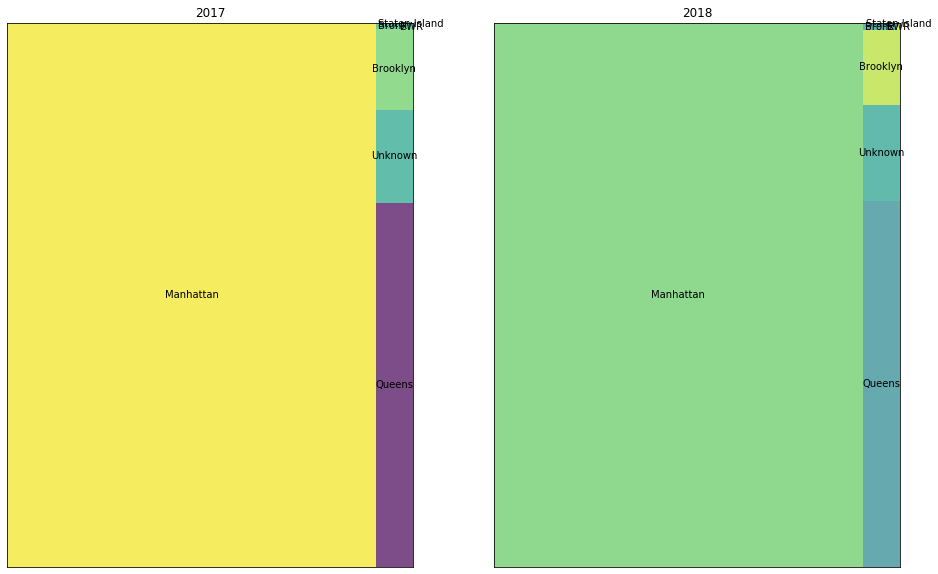

In [0]:
# visualize tree map
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,10))
ax1.set_title("2017")
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
count_indices = list(le.inverse_transform(relative_borough_2017.index))
squarify.plot(sizes=relative_borough_2017.values, label=count_indices, alpha=.7, ax=ax1)

ax2.set_title("2018")
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
count_indices = list(le.inverse_transform(relative_borough_2018.index))
squarify.plot(sizes=relative_borough_2018.values, label=count_indices, alpha=.7, ax=ax2)
plt.show()

## C. Trips in Manhattan

In [0]:
# Let me see the trip distribution in Manhattan only
y2017_manhattan = y2017_ddf_final.query("Borugh == 3.0")
y2018_manhattan = y2018_ddf_final.query("Borugh == 3.0")

manhattan_tloc_2017 = y2017_manhattan.PULocationID.groupby(y2017_manhattan.PULocationID).count()
manhattan_tloc_2017 = manhattan_tloc_2017.compute().sort_values(ascending=False)
# do the same for 2018
manhattan_tloc_2018 = y2018_manhattan.PULocationID.groupby(y2018_manhattan.PULocationID).count()
manhattan_tloc_2018 = manhattan_tloc_2018.compute().sort_values(ascending=False)

# epislon helps prevent Division by Zero
relative_mt_2017 = (manhattan_tloc_2017 * 100 / manhattan_tloc_2017.sum()) + 1e-10
relative_mt_2018 = (manhattan_tloc_2018 * 100 / manhattan_tloc_2018.sum()) + 1e-10

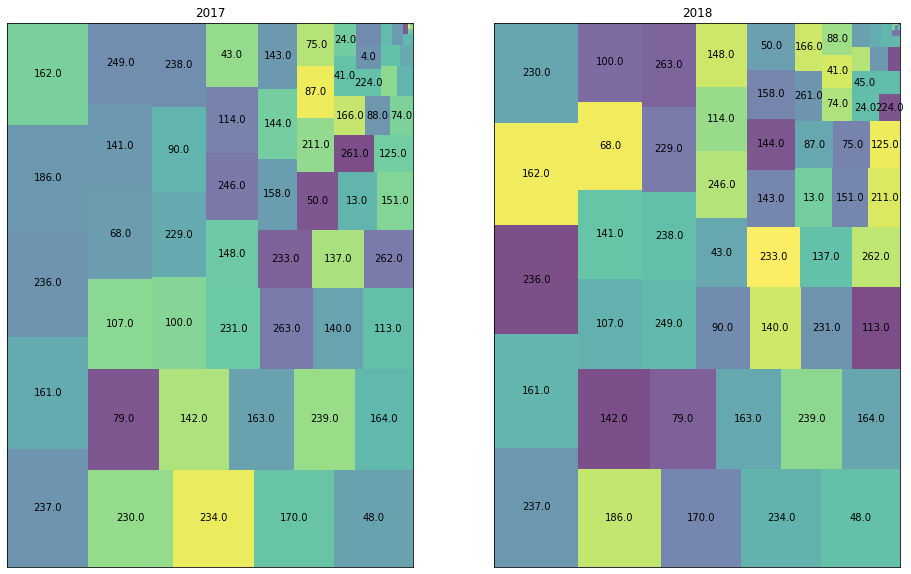

In [0]:
# visualize tree map
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,10))
ax1.set_title("2017")
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
count_indices = relative_mt_2017.index
indices = ["" if i > 50 else count_indices[i] for i in range(len(count_indices))]

squarify.plot(sizes=relative_mt_2017.values, label=indices, alpha=.7, ax=ax1)

ax2.set_title("2018")
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
count_indices = relative_mt_2018.index
indices = ["" if i > 50 else count_indices[i] for i in range(len(count_indices))]

squarify.plot(sizes=relative_mt_2018.values, label=indices, alpha=.7, ax=ax2)
plt.show()

These locations have a fair number of trips except few ones

In [0]:
manhattan_tloc_2017.iloc[-10:]

PULocationID
243.0    22670
127.0    11228
194.0     6940
202.0     5290
153.0     1117
128.0      709
120.0      664
105.0      123
104.0        1
103.0        1
Name: PULocationID, dtype: int64

In [0]:
manhattan_tloc_2018.iloc[-10:]

PULocationID
12.0     25748
243.0    13252
127.0     6487
194.0     3538
202.0     2597
153.0      951
128.0      451
120.0      341
105.0       63
104.0        1
Name: PULocationID, dtype: int64

**Where are trips picked from Manhattan destined to?**

In [0]:
# convert it to dictionary for easy access
zone_dict = dict(zip(zone_lookup.LocationID, zone_lookup.Borough_Label))
# create new column
# it uses a dictionary to convert text into numerical labels
y2017_manhattan["DBorugh"] = y2017_manhattan.DOLocationID.map(zone_dict)
y2018_manhattan["DBorugh"] = y2018_manhattan.DOLocationID.map(zone_dict)
y2018_manhattan.head()

VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2018-01-01 00:00:00        2.0   2018-01-01 00:00:00              1.0   
2018-01-01 00:00:02        2.0   2018-01-01 00:08:48              1.0   
2018-01-01 00:00:03        2.0   2018-01-01 00:03:52              3.0   
2018-01-01 00:00:04        2.0   2018-01-01 00:08:13              1.0   
2018-01-01 00:00:06        1.0   2018-01-01 00:24:34              1.0   

                      trip_distance  RatecodeID store_and_fwd_flag  \
tpep_pickup_datetime                                                 
2018-01-01 00:00:00            9.14         1.0                  N   
2018-01-01 00:00:02            1.36         1.0                  N   
2018-01-01 00:00:03            0.99         1.0                  N   
2018-01-01 00:00:04            1.59         1.0                  N   
2018-01-01 00:00:06            6.90         1.0                  N   

                      PULocationID  DOLocationID  payment_type  fare_amount  \
tpep_pickup_datetime                                                          
2018-01-01 00:00:00          229.0          17.0           2.0         27.0   
2018-01-01 00:00:02           68.0         249.0           2.0          7.5   
2018-01-01 00:00:03          236.0          43.0           2.0          5.5   
2018-01-01 00:00:04          141.0         161.0           2.0          8.0   
2018-01-01 00:00:06          162.0          49.0           1.0         23.5   

                      extra  mta_tax  tip_amount  tolls_amount  \
tpep_pickup_datetime                                             
2018-01-01 00:00:00     0.0      0.5        0.00           0.0   
2018-01-01 00:00:02     0.5      0.5        0.00           0.0   
2018-01-01 00:00:03     0.5      0.5        0.00           0.0   
2018-01-01 00:00:04     0.5      0.5        0.00           0.0   
2018-01-01 00:00:06     0.5      0.5        4.95           0.0   

                      improvement_surcharge  total_amount  Borugh  DBorugh  
tpep_pickup_datetime                                                        
2018-01-01 00:00:00                     0.3         27.80       3        1  
2018-01-01 00:00:02                     0.3          8.80       3        3  
2018-01-01 00:00:03                     0.3          6.80       3        3  
2018-01-01 00:00:04                     0.3          9.30       3        3  
2018-01-01 00:00:06                     0.3         29.75       3        1

In [0]:
y2017_manh_dest = y2017_manhattan.DBorugh.value_counts().compute()
y2018_manh_dest = y2018_manhattan.DBorugh.value_counts().compute()

In [0]:
y2017_manh_destR = y2017_manh_dest * 100/y2017_manh_dest.sum()
y2018_manh_destR = y2018_manh_dest * 100/y2018_manh_dest.sum()

In [0]:
y2017_manh_dest

3    95239949
4     3693112
1     3202194
0      509396
6      214523
2      202164
5       15736
Name: DBorugh, dtype: int64

In [0]:
y2017_manh_destR

3    92.396830
4     3.582865
1     3.106602
0     0.494189
6     0.208119
2     0.196129
5     0.015266
Name: DBorugh, dtype: float64

95 % of trips that originated from Manhattan end in Manhattan.

## D. Number of Trips by Pickup Location

In [0]:
# groupby Location ID and count trips
trips_by_loc_2017 = y2017_ddf_final.PULocationID.groupby(y2017_ddf_final.PULocationID).count()
# compute 
trips_by_loc_2017 = trips_by_loc_2017.compute().sort_values(ascending=False)

# do the same for 2018
trips_by_loc_2018 = y2018_ddf_final.PULocationID.groupby(y2018_ddf_final.PULocationID).count()
trips_by_loc_2018 = trips_by_loc_2018.compute().sort_values(ascending=False)

In [0]:
assert(trips_by_loc_2017.sum() == 113496706)

In [0]:
# relative counts in percent
# epislon helps prevent Division by Zero
relative_2017 = (trips_by_loc_2017 * 100 / trips_by_loc_2017.sum()) + 1e-10
relative_2018 = (trips_by_loc_2018 * 100 / trips_by_loc_2018.sum()) + 1e-10

The top 50 locations are mostly Manhttan

In [0]:
# replace location ids by their corresponding boroughs
locations_boroughs_2017 = pd.Series(trips_by_loc_2017.index).replace(zone_dict)

In [0]:
le.classes_

array(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island',
       'Unknown'], dtype=object)

In [0]:
# holds list of dictionaris
locs_in_borough = []

# divide the 265 partitions into 4 parts
for i in range(0, 200, 66):
  locs_in_borough.append(locations_boroughs_2017[i:i+66].value_counts().to_dict())
col_names = list(le.classes_)

# convert list of dictionaries to dataframe
locs_in_borough_df = pd.DataFrame(locs_in_borough).fillna(0)
locs_in_borough_df.columns = col_names
# drop EWR and Unknown
locs_in_borough_df.drop(["EWR", "Unknown"], axis=1, inplace=True)
locs_in_borough_df.index = ["[0-66)", "[66-132)", "[132-192)", "[192-258)"]
locs_in_borough_df

Bronx  Brooklyn  Manhattan  Queens  Staten Island
[0-66)       0.0         4         56       5            0.0
[66-132)     5.0        27          7      25            0.0
[132-192)   25.0        23          1      17            0.0
[192-258)   13.0         7          4      22           20.0

In [0]:
configure_plotly_browser_state()
 # used https://coolors.co
colors = ['#04E762', '#F5B700', '#00A1E4', '#DC0073']
traces = []
for i, col in enumerate(locs_in_borough_df):
  trace = go.Bar(
      x=locs_in_borough_df.index,
      y=locs_in_borough_df[col],
      name=col
#        marker=dict(
#         color=colors[i], opacity=0.7

#     )
  )
  traces.append(trace)


layout = go.Layout(
          xaxis=dict(
          title="Rank of Location(by Num of Trips)",
          titlefont=dict(
              family='Arial, sans-serif',
              size=18,
              #color='lightgrey'
          ),
          showticklabels=True,

      ),

      yaxis=dict(
          title="Count of Locations",
          titlefont=dict(
              family='Arial, sans-serif',
              size=18
              #color='lightgrey'
          ),
          showticklabels=True,

      ),
       barmode='stack'

  )
layout.title = "Number of Locations in the 5 Boroughs of NYC"
fig= go.Figure(data= traces, layout=layout)
pyo.iplot(fig, filename = 'bar_plot')


In [0]:
trips_by_loc_2017.iloc[100:120]


PULocationID
188.0    13806
228.0    12483
225.0    12276
127.0    11228
217.0    10441
89.0      9700
130.0     9131
196.0     8863
1.0       8353
216.0     8290
215.0     8081
195.0     7342
28.0      7292
194.0     6940
219.0     6570
207.0     6034
159.0     5908
54.0      5871
134.0     5868
190.0     5637
Name: PULocationID, dtype: int64

A tree-map shows that around 55 locations have similar number of trips.

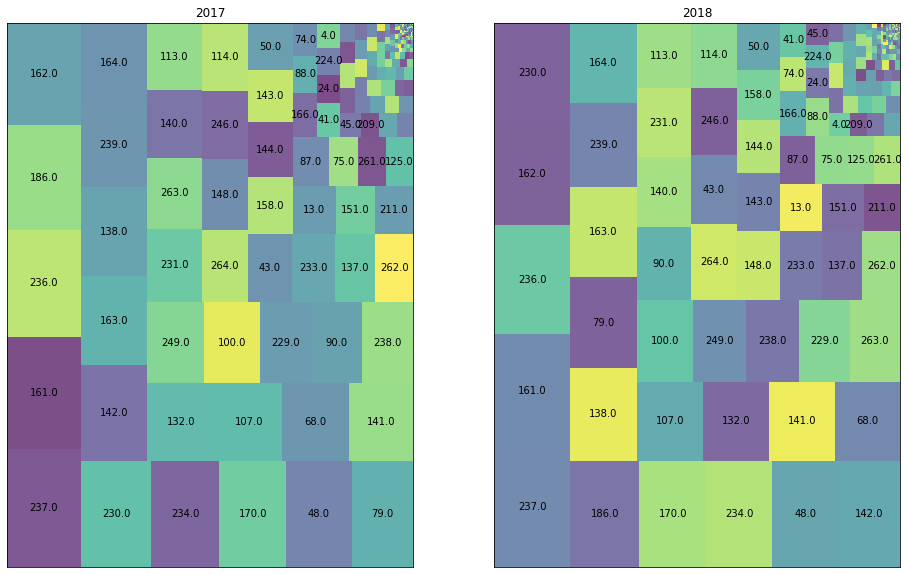

In [0]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,10))
ax1.set_title("2017")
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
count_indices = list(relative_2017.index)
indices = ["" if i > 55 else count_indices[i] for i in range(len(count_indices))]
squarify.plot(sizes=relative_2017.values, label=indices, alpha=.7, ax=ax1)

ax2.set_title("2018")
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
count_indices = list(relative_2018.index)
indices = ["" if i > 55 else count_indices[i] for i in range(len(count_indices))]
squarify.plot(sizes=relative_2018.values, label=indices, alpha=.7, ax=ax2)
plt.show()

In [0]:
# sample paritions to test
choice_2017 = np.random.choice(np.arange(165), 4)
choice_2018 = np.random.choice(np.arange(91), 4)

def plot_date_differences(loc_id, xrange):
  # collect value counts for selected partitions in 2017
  to_plot_2017 = []
  # collect value counts for selected partitions in 2018
  to_plot_2018 = []
  # filter dask dataframe by the given location
  y2017_selected = y2017_ddf_final.query(f"PULocationID == {loc_id}")
  y2018_selected = y2018_ddf_final.query(f"PULocationID == {loc_id}")
  for c in choice_2017:
    # convert the dates in partition c to pandas series
    partition_ix = pd.Series(y2017_selected.get_partition(c).index.compute())
    # shift it down by one
    prev_partition_ix = pd.Series(partition_ix).shift(1)
    # find difference and convert to seconds
    diff = (partition_ix - prev_partition_ix).astype("timedelta64[s]")
    # get value counts
    vcounts = diff.value_counts()
    # ignore same consecutive dates
    if(0 in vcounts.index):
      vcounts = vcounts.drop(0)
    # get the sum of all counts
    total_sum = vcounts.sum()
    # relative count in percentage
    vcounts = (vcounts * 100)/total_sum
    # append it to list of vcounts
    to_plot_2017.append(vcounts) 
  # do the same for 2018
  for c in choice_2018:
    partition_ix = pd.Series(y2018_selected.get_partition(c).index.compute())
    prev_partition_ix = pd.Series(partition_ix).shift(1)
    diff = (partition_ix - prev_partition_ix).astype("timedelta64[s]")
    vcounts = diff.value_counts()
    if(0 in vcounts.index):
      vcounts = vcounts.drop(0)    
    total_sum = vcounts.sum()
    vcounts = (vcounts * 100)/total_sum
    to_plot_2018.append(vcounts) 


  configure_plotly_browser_state()
  traces_2017 = []
  traces_2018 = []
  # used https://coolors.co
  colors = ['#04E762', '#F5B700', '#00A1E4', '#DC0073']
  # for i in four partitions
  for i in range(4):
    # 2017
    trace0 = go.Bar(
        x=list(to_plot_2017[i].index),
        y=list(np.round(to_plot_2017[i].values)),
        name=f"2017-P{choice_2017[i]}",
         marker=dict(
          color=colors[i], opacity=0.7

      )
    )
    # 2018
    trace1 = go.Bar(
        x=list(to_plot_2018[i].index),
        y=list(np.round(to_plot_2018[i].values)),
        name=f"2018-P{choice_2018[i]}",
         marker=dict(
          color=colors[i], opacity=0.7
         )
    )
    traces_2017.append(trace0)
    traces_2018.append(trace1)

  layout = go.Layout(
          xaxis=dict(
          title="Seconds",
          titlefont=dict(
              family='Arial, sans-serif',
              size=18,
              #color='lightgrey'
          ),
          range=xrange,
          showticklabels=True,

      ),

      yaxis=dict(
          title="Percentage",
          titlefont=dict(
              family='Arial, sans-serif',
              size=18
              #color='lightgrey'
          ),
          showticklabels=True,

      ),
       barmode='overlay'

  )
  layout.title = f"Relative Count of Durations-2017 at Location {loc_id}"
  fig2017 = go.Figure(data= traces_2017, layout=layout)
  layout.title = f"Relative Count of Durations-2018 at Location {loc_id}"
  fig2018 = go.Figure(data=traces_2018, layout=layout)


  # Plot it and save as bar_plot.html

  # static plot
  #config={'scrollZoom':False,'displayModeBar':False, "showLink":False, 'showTips':False, "staticPlot":True}
  pyo.iplot(fig2017, filename = 'bar_plot')
  pyo.iplot(fig2018, filename = 'bar_plot')


Next I tried to visualize date intervals of  locations. Some are popular, others are not

In [0]:
# The location where most trips started
plot_date_differences(237, [1, 35])

In [0]:
# Location 244 is ranked between 66 and 70( It is not far from the top)
plot_date_differences(244, xrange=[0,700])

In [0]:
# location 182 is ranked above 80
plot_date_differences(182, xrange=None)

Most locations have very small observations(those that are ranked below 100) and there is a gap between their trips. A gap of 80k seconds is almost a day.

I decided to work on trips that started from Manhattan. Because >90% of trips were picked up from there and 95% passengers were dropped in the same Borough

In [0]:
y2017_manhattan.head()

VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2017-01-01 00:00:00        2.0   2017-01-01 00:00:00              1.0   
2017-01-01 00:00:02        1.0   2017-01-01 00:03:50              1.0   
2017-01-01 00:00:02        2.0   2017-01-01 00:39:22              4.0   
2017-01-01 00:00:03        1.0   2017-01-01 00:06:58              1.0   
2017-01-01 00:00:05        1.0   2017-01-01 00:08:33              2.0   

                      trip_distance  RatecodeID store_and_fwd_flag  \
tpep_pickup_datetime                                                 
2017-01-01 00:00:00            0.02         2.0                  N   
2017-01-01 00:00:02            0.50         1.0                  N   
2017-01-01 00:00:02            7.75         1.0                  N   
2017-01-01 00:00:03            0.80         1.0                  N   
2017-01-01 00:00:05            0.90         1.0                  N   

                      PULocationID  DOLocationID  payment_type  fare_amount  \
tpep_pickup_datetime                                                          
2017-01-01 00:00:00          249.0         234.0           2.0         52.0   
2017-01-01 00:00:02           48.0          48.0           2.0          4.0   
2017-01-01 00:00:02          186.0          36.0           1.0         22.0   
2017-01-01 00:00:03          162.0         161.0           1.0          6.0   
2017-01-01 00:00:05           48.0          50.0           1.0          7.0   

                      extra  mta_tax  tip_amount  tolls_amount  \
tpep_pickup_datetime                                             
2017-01-01 00:00:00     0.0      0.5        0.00           0.0   
2017-01-01 00:00:02     0.5      0.5        0.00           0.0   
2017-01-01 00:00:02     0.5      0.5        4.66           0.0   
2017-01-01 00:00:03     0.5      0.5        1.45           0.0   
2017-01-01 00:00:05     0.5      0.5        0.00           0.0   

                      improvement_surcharge  total_amount  Borugh  DBorugh  
tpep_pickup_datetime                                                        
2017-01-01 00:00:00                     0.3         52.80       3        3  
2017-01-01 00:00:02                     0.3          5.30       3        3  
2017-01-01 00:00:02                     0.3         27.96       3        1  
2017-01-01 00:00:03                     0.3          8.75       3        3  
2017-01-01 00:00:05                     0.3          8.30       3        3

In [0]:
y2018_manhattan.head()

VendorID tpep_dropoff_datetime  passenger_count  \
tpep_pickup_datetime                                                    
2018-01-01 00:00:00        2.0   2018-01-01 00:00:00              1.0   
2018-01-01 00:00:02        2.0   2018-01-01 00:08:48              1.0   
2018-01-01 00:00:03        2.0   2018-01-01 00:03:52              3.0   
2018-01-01 00:00:04        2.0   2018-01-01 00:08:13              1.0   
2018-01-01 00:00:06        1.0   2018-01-01 00:24:34              1.0   

                      trip_distance  RatecodeID store_and_fwd_flag  \
tpep_pickup_datetime                                                 
2018-01-01 00:00:00            9.14         1.0                  N   
2018-01-01 00:00:02            1.36         1.0                  N   
2018-01-01 00:00:03            0.99         1.0                  N   
2018-01-01 00:00:04            1.59         1.0                  N   
2018-01-01 00:00:06            6.90         1.0                  N   

                      PULocationID  DOLocationID  payment_type  fare_amount  \
tpep_pickup_datetime                                                          
2018-01-01 00:00:00          229.0          17.0           2.0         27.0   
2018-01-01 00:00:02           68.0         249.0           2.0          7.5   
2018-01-01 00:00:03          236.0          43.0           2.0          5.5   
2018-01-01 00:00:04          141.0         161.0           2.0          8.0   
2018-01-01 00:00:06          162.0          49.0           1.0         23.5   

                      extra  mta_tax  tip_amount  tolls_amount  \
tpep_pickup_datetime                                             
2018-01-01 00:00:00     0.0      0.5        0.00           0.0   
2018-01-01 00:00:02     0.5      0.5        0.00           0.0   
2018-01-01 00:00:03     0.5      0.5        0.00           0.0   
2018-01-01 00:00:04     0.5      0.5        0.00           0.0   
2018-01-01 00:00:06     0.5      0.5        4.95           0.0   

                      improvement_surcharge  total_amount  Borugh  DBorugh  
tpep_pickup_datetime                                                        
2018-01-01 00:00:00                     0.3         27.80       3        1  
2018-01-01 00:00:02                     0.3          8.80       3        3  
2018-01-01 00:00:03                     0.3          6.80       3        3  
2018-01-01 00:00:04                     0.3          9.30       3        3  
2018-01-01 00:00:06                     0.3         29.75       3        1

In [0]:
# save to disk
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y2017_manhattan.to_parquet("taxi_data/y2017_manhattan.parquet", engine="fastparquet")
    y2018_manhattan.to_parquet("taxi_data/y2018_manhattan.parquet", engine="fastparquet")

## Phase 3: Data Cleaning and Feature Selection

In [0]:
# load data

# directory structure of the mounted drive(for google colab)
#directory_in_str = "/content/drive/My Drive/taxi_data/"

# load from disk
import warnings
with warnings.catch_warnings():
    y2017_manhattan = dd.read_parquet("taxi_data/y2017_manhattan.parquet")
    y2018_manhattan = dd.read_parquet("taxi_data/y2018_manhattan.parquet")

In [0]:
# Filter trips that end in Manhattan
y2017_manhattan = y2017_manhattan.query("DBorugh == 3")
y2018_manhattan = y2018_manhattan.query("DBorugh == 3")

In [0]:
len(y2017_manhattan)

95239949

In [0]:
len(y2018_manhattan)

53420377

### A. Passenger Count

"The maximum amount of passengers allowed in a yellow taxicab by law is four (4) in a four (4) passenger taxicab or five (5) passengers in a five (5) passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven (7) and is held on the lap of an adult passenger seated in the rear."

These counts are reported by drivers. There are prone to errors

In [0]:
passenger_count_desc_2017 = y2017_manhattan.passenger_count.describe().compute()
passenger_count_desc_2018 = y2018_manhattan.passenger_count.describe().compute()

In [0]:
passenger_count_desc_2017

count    9.523995e+07
mean     1.625748e+00
std      1.267281e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.920000e+02
dtype: float64

In [0]:
passenger_count_desc_2018

count    5.342038e+07
mean     1.601341e+00
std      1.250297e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.920000e+02
dtype: float64

In [0]:
# how many of them are above 6
print(len(y2017_manhattan.query("passenger_count > 6")))
print(len(y2018_manhattan.query("passenger_count > 6")))

# how many of them are zero
print(len(y2017_manhattan.query("passenger_count == 0")))
print(len(y2018_manhattan.query("passenger_count == 0")))

318
220
130182
378326


In [0]:
All are below one percent of the dataset so they can be safely deleted.

Alternatives
* Fill by the median passenger counts in the same area
* Forward Fill from previous timestamps in the same area

In [0]:
y2017_manhattan = y2017_manhattan.query("0 < passenger_count <= 6")
y2018_manhattan = y2018_manhattan.query("0 < passenger_count <= 6")

### B. Trip Distance / Fares

**How  are standard fares calculated?**

$2.50 initial charge.

Plus 50 cents per 1/5 mile when traveling above 12mph or per 60 seconds in slow traffic or when the vehicle is stopped.

Plus 50 cents MTA State Surcharge for all trips that end in New York City or Nassau, Suffolk, Westchester, Rockland, Dutchess, Orange or Putnam Counties.

Plus 30 cents Improvement Surcharge.

Plus 50 cents overnight surcharge 8pm to 6am.

Plus $1.00 rush hour surcharge from 4pm to 8pm on weekdays, excluding holidays.

Plus New York State Congestion Surcharge of \\$2.50 (Yellow Taxi) or \\$2.75 (Green Taxi and FHV) or 75 cents (any shared ride) for all trips that begin, end or pass through Manhattan south of 96th Street.

Plus tips and any tolls.

There is no charge for extra passengers, luggage or bags, or paying by credit card.

The on-screen rate message should read: "Rate #01 – Standard City Rate."

Make sure to always take your receipt.

In [0]:
# remove negative trip_distances
y2017_manhattan = y2017_manhattan.query("trip_distance >= 0")
y2018_manhattan = y2018_manhattan.query("trip_distance >= 0")

In [0]:
# see distribution of rate code ids. I am interested in the standard metered fees(1.0)
y2017_manhattan.RatecodeID.value_counts().compute()

1.0     94902330
2.0        98883
5.0        92903
3.0        12011
4.0         2743
6.0          548
99.0          31
Name: RatecodeID, dtype: int64

In [0]:
# remove other rate code ids except 01
# it ensures that all trips used for this project are within newyork city
# , there are no negotiated prices and all are calculated by the meter
y2017_manhattan = y2017_manhattan.query("RatecodeID == 1")
y2018_manhattan = y2018_manhattan.query("RatecodeID == 1")

In [0]:
# see how customers are paying
y2017_manhattan.payment_type.value_counts().compute()

1.0    63689714
2.0    30687231
3.0      402420
4.0      122965
Name: payment_type, dtype: int64

In [0]:
# # a chart showing the above value counts

# #configure_plotly_browser_state() # for colab

# trace0 = go.Bar(
#     x=["Credit card", "Cash", "No Charge", "Dispute", "Unknown", "Voided Trip"],
#     y=relative_2017.values,
#     name="2017"
# )
# trace1 = go.Bar(
#     x=["Credit card", "Cash", "No Charge", "Dispute", "Unknown", "Voided Trip"],
#     y=relative_2018.values,
#     name="2018"
# )


# layout = go.Layout(
#         xaxis=dict(
#         title='How do customers pay?(%)',
#         titlefont=dict(
#             family='Arial, sans-serif',
#             size=18,
#             color='lightgrey'
#         ),
#         autorange=True,
#         showgrid=False,
#         zeroline=False,
#         showline=False,
#         ticks='',
#         showticklabels=True
#     ),
#     yaxis=dict(
#         title='Number',
#         titlefont=dict(
#             family='Arial, sans-serif',
#             size=18,
#             color='lightgrey'
#         ),
#         autorange=True,
#         showgrid=False,
#         zeroline=False,
#         showline=False,
#         ticks='',
#         showticklabels=True
#     )
# )

# # Fill out data with our traces
# data = [trace0, trace1]

# fig = go.Figure(data=data, layout=layout)


# # Plot it and save as basic-line.html
# # static plot
# #config={'scrollZoom':False,'displayModeBar':False, "showLink":False, 'showTips':False, "staticPlot":True}
# pyo.iplot(fig, filename = 'basic-line')

In [0]:
# keep cash and credit card payments only
y2017_manhattan = y2017_manhattan.query("1 <= payment_type <= 2")
y2018_manhattan = y2018_manhattan.query("1 <= payment_type <= 2")

In [0]:
# trip distance
trip_distance_des_2017 = y2017_manhattan.trip_distance.describe().compute()
trip_distance_des_2018 = y2018_manhattan.trip_distance.describe().compute()

In [0]:
trip_distance_des_2017

count    9.437694e+07
mean     1.863009e+00
std      1.463176e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.600000e+00
75%      2.530000e+00
max      1.178600e+03
dtype: float64

In [0]:
trip_distance_des_2018

count    5.263007e+07
mean     1.836951e+00
std      1.452049e+00
min      0.000000e+00
25%      9.600000e-01
50%      1.510000e+00
75%      2.490000e+00
max      9.435000e+02
dtype: float64

In [0]:
mean_2017 = trip_distance_des_2017["mean"]
std_2017 = trip_distance_des_2017["std"]
mean_2018 = trip_distance_des_2018["mean"]
std_2018 = trip_distance_des_2018["std"]
# find zscores
zscores_2017 = stats.zscore(y2017_manhattan.trip_distance, ddof=1)
zscores_2018 = stats.zscore(y2018_manhattan.trip_distance, ddof=1)
# print minimum and maximum
np.min(zscores_2017), np.min(zscores_2018), np.max(zscores_2017), np.max(zscores_2018)

(-1.2732632742141796,
 -1.2650756327844157,
 804.2344941521355,
 648.5065082272653)

In [0]:
# the lowest zscore is -1 so there are no outliers on the lower side
ub_2017 = (3.0 * std_2017) + mean_2017
ub_2018 = (3.0 * std_2018) + mean_2018
ub_2017, ub_2018

(6.252538288496038, 6.193097635366623)

In [0]:
# how many trip distances are more than 3 STDS above the mean
len(y2017_manhattan.query("trip_distance > 7")), len(y2018_manhattan.query("trip_distance > 7"))

(1147592, 620779)

In [0]:
longest_trips_2017 = y2017_manhattan.query("trip_distance > 7").compute()
longest_trips_2018 = y2018_manhattan.query("trip_distance > 7").compute()
# longest_trips_2017.head()

In [0]:
# remove trips that are greater than 8 miles
y2017_manhattan = y2017_manhattan.query("trip_distance < 8")
y2018_manhattan = y2018_manhattan.query("trip_distance < 8")

In [0]:
# fare amount
# remove fares smaller than $2.50
y2017_manhattan = y2017_manhattan.query("fare_amount >= 2.50")
y2018_manhattan = y2018_manhattan.query("fare_amount >= 2.50")

In [0]:
# descirbe fare amount
fare_amount_des_2017 = y2017_manhattan.fare_amount.describe().compute()
fare_amount_des_2018 = y2018_manhattan.fare_amount.describe().compute()

In [0]:
fare_amount_des_2017

count    9.378921e+07
mean     9.749047e+00
std      8.050901e+01
min      2.500000e+00
25%      6.500000e+00
50%      9.500000e+00
75%      1.400000e+01
max      6.304618e+05
dtype: float64

In [0]:
fare_amount_des_2018

count    5.231218e+07
mean     9.538824e+00
std      4.737851e+00
min      2.500000e+00
25%      6.500000e+00
50%      9.000000e+00
75%      1.300000e+01
max      4.023000e+03
dtype: float64

In [0]:
mean_2017 = fare_amount_des_2017["mean"]
std_2017 = fare_amount_des_2017["std"]
mean_2018 = fare_amount_des_2018["mean"]
std_2018 = fare_amount_des_2018["std"]
# find zscores
zscores_2017 = stats.zscore(y2017_manhattan.fare_amount, ddof=1)
zscores_2018 = stats.zscore(y2018_manhattan.fare_amount, ddof=1)
# print minimum and maximum
np.min(zscores_2017), np.min(zscores_2018), np.max(zscores_2017), np.max(zscores_2018)

(-0.09004019740877998,
 -1.4856575694632381,
 7830.826312624037,
 847.1057897739132)

In [0]:
# no lower bound because minimum zscore is greater than -3
ub_2017 = (3.0 * std_2017) + mean_2017
ub_2018 = (3.0 * std_2018) + mean_2018
print("upper-bounds", ub_2017, ub_2018)

upper-bounds 251.27607598618954 23.752378060710516


The upper bound for 2017 data is high because of a very extreme outlier = \\$630400. I can guess how large a fare amount could be. If a taxi travels without stopping above 12mph a 10 mile trip will cost \\$25. If a taxi stops or travels below \\$12mph for 2 hours it costs $60. Two hours traveling below \\$12mph is rare for a maximum of 8 mile trip.

In [0]:
# $ 30 seems reasonable cut-point
y2017_manhattan = y2017_manhattan.query("fare_amount < 30.0")
y2018_manhattan = y2018_manhattan.query("fare_amount < 30.0")

In [0]:
len(y2017_manhattan)

93608570

In [0]:
len(y2018_manhattan)

52231978

### C. Duration / Speed

In [0]:
y2017_manhattan["duration"] = (y2017_manhattan.tpep_dropoff_datetime - y2017_manhattan.index).astype('timedelta64[s]')
# convert seconds to hours
y2017_manhattan["duration"] = (y2017_manhattan["duration"]/3600.)
# miles per hour
y2017_manhattan["speed"] = y2017_manhattan.trip_distance / y2017_manhattan.duration

# do the same for 2018
y2018_manhattan["duration"] = (y2018_manhattan.tpep_dropoff_datetime - y2018_manhattan.index).astype('timedelta64[s]')
y2018_manhattan["duration"] = (y2018_manhattan["duration"]/3600.)
y2018_manhattan["speed"] = y2018_manhattan.trip_distance / y2018_manhattan.duration

In [0]:
# remove negative and zero durations
y2017_manhattan = y2017_manhattan.query("duration > 0")
y2018_manhattan = y2018_manhattan.query("duration > 0")

In [0]:
duration_desc_2017 = y2017_manhattan.duration.describe().compute()
duration_desc_2018 = y2018_manhattan.duration.describe().compute()

In [0]:
duration_desc_2017

count    9.360683e+07
mean     2.287221e-01
std      1.594063e+00
min      2.777778e-04
25%      1.183333e-01
50%      1.961111e-01
75%      3.105556e-01
max      1.262953e+04
dtype: float64

In [0]:
duration_desc_2018

count    5.223145e+07
mean     2.308942e-01
std      1.002957e+00
min      2.777778e-04
25%      1.136111e-01
50%      1.866667e-01
75%      2.933333e-01
max      3.274194e+01
dtype: float64

In [0]:
mean_2017 = duration_desc_2017["mean"]
std_2017 = duration_desc_2017["std"]
mean_2018 = duration_desc_2018["mean"]
std_2018 = duration_desc_2018["std"]
# find zscores
zscores_2017 = stats.zscore(y2017_manhattan.duration, ddof=1)
zscores_2018 = stats.zscore(y2018_manhattan.duration, ddof=1)
# print minimum and maximum
np.min(zscores_2017), np.min(zscores_2018), np.max(zscores_2017), np.max(zscores_2018)

(-0.14330947713042577,
 -0.22993652230192266,
 7922.710796124516,
 32.41520209774314)

In [0]:
len(y2017_manhattan.query("duration > 2"))

145113

In [0]:
len(y2018_manhattan.query("duration > 2"))

99209

In [0]:
# most trips are below two hours. 
y2017_manhattan = y2017_manhattan.query("duration < 2 ")
y2018_manhattan = y2018_manhattan.query("duration < 2 ")

In [0]:
# save to disk
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    y2017_manhattan.to_parquet("taxi_data/y2017_manhattan_final.parquet", engine="fastparquet")
    y2018_manhattan.to_parquet("taxi_data/y2018_manhattan_final.parquet", engine="fastparquet")

## Phase 4. Data Aggergation

In [0]:
# load data

# directory structure of the mounted drive(for google colab)
directory_in_str = "/content/drive/My Drive/taxi_data/"
# directory structure for Google cloud platform or local pc
# directory_in_str = "taxi_data/"
# selected columns
# I didn't select speed here, it will be calculated after aggregating trip_distances and trip_durations per 10min
# DULocationID is categorical, so aggregating it doesn't make sense
scolumns = ['PULocationID',
            'passenger_count', 
            'trip_distance',
            'duration',
           'fare_amount'
          ]

# load from disk
import warnings
with warnings.catch_warnings():
    y2017_manhattan_final = dd.read_parquet(directory_in_str + "y2017_manhattan_final.parquet", columns=scolumns)
    y2018_manhattan_final = dd.read_parquet(directory_in_str + "y2018_manhattan_final.parquet", columns=scolumns)

In [0]:
y2017_manhattan_final.isnull().sum().compute()

PULocationID       0
passenger_count    0
trip_distance      0
duration           0
fare_amount        0
dtype: int64

In [0]:
y2018_manhattan_final.isnull().sum().compute()

PULocationID       0
passenger_count    0
trip_distance      0
duration           0
fare_amount        0
dtype: int64

### Resample by Location

In [0]:
# import warnings
# def per_group(blk, dura):
#     return blk.resample(dura).mean()

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     y2017_resampled = y2017_ddf_final.groupby("PULocationID").apply(per_group, "2H")
#     y2017_resampled.to_csv(f"taxi_data/y2017_samples/y2017_2H.csv")

In [0]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #resample_duration = ["10min", "30min", "1H"]
    #resample_duration = ["10min"]
    #resample_duration = ["30min", "1H"]
    for dur in resample_duration:
        print("resampling by ", dur)
        y2017_manhattan_final_resampled = y2017_manhattan_final.groupby("PULocationID").apply(lambda x: x.resample(dur).sum()).compute()
        y2017_manhattan_final_resampled = y2017_manhattan_final_resampled.drop("PULocationID", axis=1)
        # get average speed(in mph) from aggregated data
        y2017_manhattan_final_resampled["speed"] = y2017_manhattan_final_resampled.trip_distance / y2017_manhattan_final_resampled.duration    
        y2017_manhattan_final_resampled.to_csv(f"{directory_in_str}/y2017_samples/y2017_{dur}.csv")

resampling by  30min
resampling by  1H


In [0]:
y2017_manhattan_final_resampled.head()

passenger_count  trip_distance   duration  \
PULocationID tpep_pickup_datetime                                              
87.0         2017-01-01 00:00:00             202.0         435.90  28.798611   
             2017-01-01 01:00:00             351.0         767.67  51.743056   
             2017-01-01 02:00:00             222.0         419.02  29.115000   
             2017-01-01 03:00:00             172.0         339.94  19.143889   
             2017-01-01 04:00:00              64.0         142.16   7.043056   

                                   fare_amount      speed  
PULocationID tpep_pickup_datetime                          
87.0         2017-01-01 00:00:00        1695.5  15.136147  
             2017-01-01 01:00:00        2937.5  14.836194  
             2017-01-01 02:00:00        1657.0  14.391894  
             2017-01-01 03:00:00        1248.5  17.757103  
             2017-01-01 04:00:00         500.5  20.184421

In [0]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    #resample_duration = ["10min", "30min", "1H"]
    #resample_duration = ["10min"]
    resample_duration = ["30min","1H"]

    for dur in resample_duration:
        print("resampling by ", dur)
        y2018_manhattan_final_resampled = y2018_manhattan_final.groupby("PULocationID").apply(lambda x: x.resample(dur).sum()).compute()
        y2018_manhattan_final_resampled = y2018_manhattan_final_resampled.drop("PULocationID", axis=1)
        # get average speed(in mph) from aggregated data
        y2018_manhattan_final_resampled["speed"] = y2018_manhattan_final_resampled.trip_distance / y2018_manhattan_final_resampled.duration    
        y2018_manhattan_final_resampled.to_csv(f"{directory_in_str}/y2018_samples/y2018_{dur}.csv")

resampling by  30min
resampling by  1H


In [0]:
y2018_manhattan_final_resampled.head()

passenger_count  trip_distance  duration  \
PULocationID tpep_pickup_datetime                                             
88.0         2018-01-01 00:00:00              55.0         112.55  7.150556   
             2018-01-01 01:00:00              89.0         123.70  9.181111   
             2018-01-01 02:00:00              58.0         111.89  6.725278   
             2018-01-01 03:00:00              34.0          85.89  5.028056   
             2018-01-01 04:00:00              30.0          63.29  3.086667   

                                   fare_amount      speed  
PULocationID tpep_pickup_datetime                          
88.0         2018-01-01 00:00:00         437.0  15.740036  
             2018-01-01 01:00:00         513.0  13.473315  
             2018-01-01 02:00:00         428.0  16.637231  
             2018-01-01 03:00:00         318.5  17.082150  
             2018-01-01 04:00:00         218.5  20.504320

### How much to resample?

Resampling every minute, ten minute, hour or day depends on the availablilty of trips and signficance of forecasting. I tried to resample every 10 minute, 30 minute and one hour. I excluded locations which contain 0 trip data for many time stamps. I kept only those locations which have enough number of trips. 95% of the time stamps shall contain values.

There are 68 locations to experiment

In [9]:
y2017_manhattan_final.PULocationID.unique().compute().sort_values().values

array([  4.,  12.,  13.,  24.,  41.,  42.,  43.,  45.,  48.,  50.,  68.,
        74.,  75.,  79.,  87.,  88.,  90., 100., 103., 105., 107., 113.,
       114., 116., 120., 125., 127., 128., 137., 140., 141., 142., 143.,
       144., 148., 151., 152., 153., 158., 161., 162., 163., 164., 166.,
       170., 186., 194., 202., 209., 211., 224., 229., 230., 231., 232.,
       233., 234., 236., 237., 238., 239., 243., 244., 246., 249., 261.,
       262., 263.])

In [10]:
y2018_manhattan_final.PULocationID.unique().compute().sort_values().values

array([  4.,  12.,  13.,  24.,  41.,  42.,  43.,  45.,  48.,  50.,  68.,
        74.,  75.,  79.,  87.,  88.,  90., 100., 104., 105., 107., 113.,
       114., 116., 120., 125., 127., 128., 137., 140., 141., 142., 143.,
       144., 148., 151., 152., 153., 158., 161., 162., 163., 164., 166.,
       170., 186., 194., 202., 209., 211., 224., 229., 230., 231., 232.,
       233., 234., 236., 237., 238., 239., 243., 244., 246., 249., 261.,
       262., 263.])

See the analysis below. 67 locations passed 95% availability when data is resampled every hour. Ten minutes resulted in 43 locations while 30 minute resulted in 56 locations

In [12]:
year = 2017
for dur in ["10min", "30min", "1H"]:
  print()
  print(dur)
  df = pd.read_csv(directory_in_str + f"/y{year}_samples/y{year}_{dur}.csv", 
                   index_col=1)
  # how many percent of it is 0
  number_of_trips = df.groupby("PULocationID").size()
  zeros_percent = df.groupby("PULocationID").\
  apply(lambda g: np.sum((g.fare_amount == 0))*100/len(g))
  
  combined = pd.concat([number_of_trips, zeros_percent], axis=1)
  combined.columns = ["num_trips", "zeros_percent"]
  # sort by number of trips followed by amount of nulls
  combined.sort_values(by=["num_trips", "zeros_percent"], ascending=False, inplace=True)
  #print(combined)
  mean = np.mean(combined.num_trips)
  std = np.std(combined.num_trips, ddof=1)
  # lower bound
  lb = -3 * std + mean
  #print(lb)
  #print(combined)
  # number of trips in a location shall not be very small(non-outlier)
  selected_locations2 = combined.query("num_trips > @lb & zeros_percent < 5").index
  print(len(selected_locations2))
  print(selected_locations2)


10min
43
Float64Index([211.0, 143.0,  87.0, 125.0, 166.0,  41.0, 151.0,  74.0, 233.0,
              144.0, 158.0, 236.0,  75.0, 140.0, 137.0, 237.0,  50.0, 113.0,
              246.0, 238.0, 231.0, 239.0, 114.0, 142.0, 161.0, 229.0, 163.0,
              148.0, 162.0, 170.0, 263.0, 234.0, 141.0, 186.0,  90.0, 100.0,
              107.0, 164.0, 249.0,  68.0,  48.0,  79.0, 230.0],
             dtype='float64', name='PULocationID')

30min
56
Float64Index([ 45.0, 152.0, 224.0, 232.0, 116.0,  88.0, 261.0,  13.0,  42.0,
               43.0,   4.0, 211.0, 262.0,  87.0,  24.0, 125.0, 143.0, 158.0,
               41.0, 233.0, 166.0, 144.0, 151.0, 236.0,  74.0, 140.0,  50.0,
              246.0, 113.0, 237.0,  75.0, 137.0, 229.0, 231.0, 114.0, 161.0,
              163.0, 238.0, 162.0, 170.0, 239.0, 263.0,  48.0,  68.0,  90.0,
              100.0, 107.0, 141.0, 142.0, 148.0, 164.0, 186.0, 230.0, 234.0,
               79.0, 249.0],
             dtype='float64', name='PULocationID')

1H
67
Float64I

## Phase 5. Univariate Forecasting: ARIMA

In [0]:
# these are sorted by availabilty of trips every 10 minutes. Location 211 has the most, 230 has the least
selected_locations = [211.0, 143.0,  87.0, 125.0, 166.0,  41.0, 151.0,  74.0, 233.0,
              144.0, 158.0, 236.0,  75.0, 140.0, 137.0, 237.0,  50.0, 113.0,
              246.0, 238.0, 231.0, 239.0, 114.0, 142.0, 161.0, 229.0, 163.0,
              148.0, 162.0, 170.0, 263.0, 234.0, 141.0, 186.0,  90.0, 100.0,
              107.0, 164.0, 249.0,  68.0,  48.0,  79.0, 230.0]

In [8]:
year = 2017
dur = "10min"
directory_in_str = "/content/drive/My Drive/taxi_data/"

y2017_10min_df = pd.read_csv(directory_in_str + f"/y{year}_samples/y{year}_{dur}.csv", 
                   index_col=1)
y2017_10min_df.index = pd.to_datetime(y2017_10min_df.index)
y2017_10min_df.head()

PULocationID  passenger_count  trip_distance  duration  \
tpep_pickup_datetime                                                           
2017-01-01 00:00:00           87.0             23.0          44.21  2.783611   
2017-01-01 00:10:00           87.0             28.0          52.08  3.429167   
2017-01-01 00:20:00           87.0             36.0          65.13  3.998333   
2017-01-01 00:30:00           87.0             42.0          90.38  6.079444   
2017-01-01 00:40:00           87.0             48.0         125.33  8.217222   

                      fare_amount      speed  
tpep_pickup_datetime                          
2017-01-01 00:00:00         169.0  15.882247  
2017-01-01 00:10:00         203.0  15.187363  
2017-01-01 00:20:00         254.5  16.289287  
2017-01-01 00:30:00         356.5  14.866490  
2017-01-01 00:40:00         478.5  15.252113

In [10]:
year = 2018
dur = "10min"
directory_in_str = "/content/drive/My Drive/taxi_data/"

y2018_10min_df = pd.read_csv(directory_in_str + f"/y{year}_samples/y{year}_{dur}.csv", 
                   index_col=1)
y2018_10min_df.index = pd.to_datetime(y2018_10min_df.index)
y2018_10min_df.head()

PULocationID  passenger_count  trip_distance  duration  \
tpep_pickup_datetime                                                           
2018-01-01 00:00:00           88.0              2.0           4.03  0.213889   
2018-01-01 00:10:00           88.0             14.0          26.20  1.657778   
2018-01-01 00:20:00           88.0              9.0          22.20  1.231944   
2018-01-01 00:30:00           88.0             14.0          27.59  2.032222   
2018-01-01 00:40:00           88.0              9.0          13.34  0.896667   

                      fare_amount      speed  
tpep_pickup_datetime                          
2018-01-01 00:00:00          16.0  18.841558  
2018-01-01 00:10:00         101.0  15.804290  
2018-01-01 00:20:00          85.5  18.020293  
2018-01-01 00:30:00         110.0  13.576271  
2018-01-01 00:40:00          54.0  14.877323

In [11]:
print(y2017_10min_df.index)
print(y2017_10min_df.fare_amount.describe())

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:10:00',
               '2017-01-01 00:20:00', '2017-01-01 00:30:00',
               '2017-01-01 00:40:00', '2017-01-01 00:50:00',
               '2017-01-01 01:00:00', '2017-01-01 01:10:00',
               '2017-01-01 01:20:00', '2017-01-01 01:30:00',
               ...
               '2017-12-31 22:20:00', '2017-12-31 22:30:00',
               '2017-12-31 22:40:00', '2017-12-31 22:50:00',
               '2017-12-31 23:00:00', '2017-12-31 23:10:00',
               '2017-12-31 23:20:00', '2017-12-31 23:30:00',
               '2017-12-31 23:40:00', '2017-12-31 23:50:00'],
              dtype='datetime64[ns]', name='tpep_pickup_datetime', length=3519991, freq=None)
count    3.519991e+06
mean     2.571973e+02
std      3.170606e+02
min      0.000000e+00
25%      2.200000e+01
50%      1.265000e+02
75%      3.955000e+02
max      4.733500e+03
Name: fare_amount, dtype: float64


In [12]:
print(y2018_10min_df.index)
print(y2018_10min_df.fare_amount.describe())

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:10:00',
               '2018-01-01 00:20:00', '2018-01-01 00:30:00',
               '2018-01-01 00:40:00', '2018-01-01 00:50:00',
               '2018-01-01 01:00:00', '2018-01-01 01:10:00',
               '2018-01-01 01:20:00', '2018-01-01 01:30:00',
               ...
               '2018-06-30 22:20:00', '2018-06-30 22:30:00',
               '2018-06-30 22:40:00', '2018-06-30 22:50:00',
               '2018-06-30 23:00:00', '2018-06-30 23:10:00',
               '2018-06-30 23:20:00', '2018-06-30 23:30:00',
               '2018-06-30 23:40:00', '2018-06-30 23:50:00'],
              dtype='datetime64[ns]', name='tpep_pickup_datetime', length=2225283, freq=None)
count    2.225283e+06
mean     2.225638e+02
std      3.591947e+02
min      0.000000e+00
25%      0.000000e+00
50%      5.400000e+01
75%      3.165000e+02
max      5.495500e+03
Name: fare_amount, dtype: float64


In [0]:
# selected locations
y2017_10min_df = y2017_10min_df.query('PULocationID in @selected_locations')
# selected locations
y2018_10min_df = y2018_10min_df.query('PULocationID in @selected_locations')

In [17]:
# combine data
taxi_201718_10min = y2017_10min_df.append(y2018_10min_df)
taxi_201718_10min.tail()

PULocationID  passenger_count  trip_distance  duration  \
tpep_pickup_datetime                                                           
2018-06-30 23:10:00          166.0             11.0          21.16  1.404444   
2018-06-30 23:20:00          166.0             15.0          18.18  1.489444   
2018-06-30 23:30:00          166.0             18.0          11.73  1.036111   
2018-06-30 23:40:00          166.0              4.0           5.26  0.484444   
2018-06-30 23:50:00          166.0              6.0           9.75  0.580278   

                      fare_amount      speed  
tpep_pickup_datetime                          
2018-06-30 23:10:00          83.5  15.066456  
2018-06-30 23:20:00          85.0  12.205893  
2018-06-30 23:30:00          61.5  11.321180  
2018-06-30 23:40:00          26.0  10.857798  
2018-06-30 23:50:00          41.0  16.802298

In [18]:
# view data
taxi_201718_10min.query("PULocationID == 237").iloc[20000:20005]

PULocationID  passenger_count  trip_distance   duration  \
tpep_pickup_datetime                                                            
2017-05-19 21:20:00          237.0            145.0         171.26  16.205000   
2017-05-19 21:30:00          237.0            168.0         162.54  16.893056   
2017-05-19 21:40:00          237.0            160.0         153.27  14.810000   
2017-05-19 21:50:00          237.0            189.0         206.53  20.797500   
2017-05-19 22:00:00          237.0            169.0         129.30  14.908889   

                      fare_amount      speed  
tpep_pickup_datetime                          
2017-05-19 21:20:00         850.0  10.568343  
2017-05-19 21:30:00         870.5   9.621705  
2017-05-19 21:40:00         789.5  10.349088  
2017-05-19 21:50:00        1073.0   9.930520  
2017-05-19 22:00:00         775.0   8.672678

In [20]:
print(len(taxi_201718_10min[taxi_201718_10min.speed.isnull()]))
taxi_201718_10min[taxi_201718_10min.speed.isnull()].head()

475727


PULocationID  passenger_count  trip_distance  duration  \
tpep_pickup_datetime                                                           
2017-01-01 08:10:00           87.0              0.0            0.0       0.0   
2017-01-02 02:00:00           87.0              0.0            0.0       0.0   
2017-01-02 02:10:00           87.0              0.0            0.0       0.0   
2017-01-02 02:30:00           87.0              0.0            0.0       0.0   
2017-01-02 03:10:00           87.0              0.0            0.0       0.0   

                      fare_amount  speed  
tpep_pickup_datetime                      
2017-01-01 08:10:00           0.0    NaN  
2017-01-02 02:00:00           0.0    NaN  
2017-01-02 02:10:00           0.0    NaN  
2017-01-02 02:30:00           0.0    NaN  
2017-01-02 03:10:00           0.0    NaN

In [0]:
# ffill zeros 
taxi_201718_10min_ff = taxi_201718_10min.replace(to_replace=0, method="ffill")

In [0]:
# recompute speed for NaNs
taxi_201718_10min_ff.speed.fillna(taxi_201718_10min_ff.trip_distance/taxi_201718_10min_ff.duration, inplace=True)

In [0]:
# select two locations to study
loc237_df = taxi_201718_10min_ff.query("PULocationID == 237")
loc79_df = taxi_201718_10min_ff.query("PULocationID == 79")

### Visual Inspection

Plotting the series clearly shows that the data is not stationary. The mean and variance of each time stamp doesn't seem to be constant. Since I am interested in forecasting every 10 minutes, I need to zoom in to see how taxi fares fluctuate every day

In [34]:
# overall plot
configure_plotly_browser_state()
trace237 = go.Scatter(x=loc237.index, y=loc237.fare_amount, mode="lines", name="loc-237") 
trace79 = go.Scatter(x=loc79.index, y=loc79.fare_amount, mode="lines", name="loc-79") 


fig = tools.make_subplots(rows=1, cols=2, shared_yaxes=True, subplot_titles=('Loc 237', 'Loc79'))
                                                         
fig.append_trace(trace237, 1, 1)
fig.append_trace(trace79, 1, 2)

fig['layout'].update(height=600, width=1024, title='')
config={'scrollZoom':False,'displayModeBar':False, "showLink":False, 'showTips':False, "staticPlot":True}

pyo.iplot(fig, filename='make-subplots-multiple-with-titles', config=config)


Output hidden; open in https://colab.research.google.com to view.

In [0]:
# monthly plot
def plot_monthly(the_data):
    configure_plotly_browser_state()
    mtitles = pd.Series(np.arange(1, 13)).apply(lambda x: calendar.month_abbr[x])
    #print(mtitles)
    fig = tools.make_subplots(rows=3, cols=4, subplot_titles=mtitles.values)

    row = 1
    col = 1
    for i in range(1, 13):
      monthly_data = the_data.loc[f"2017-{i}"]
      trace = go.Scatter(x=monthly_data.index, y=monthly_data.fare_amount, mode="lines", name=f"{mtitles[i-1]}") 
      fig.append_trace(trace, row, col)
      if(col == 4):
        row += 1
        col = 1
      else:
        col +=1

    #fig.append_trace(trace79, 1, 2)

    fig['layout'].update(height=600, width=1024, title='')
    config={'scrollZoom':False,'displayModeBar':False, "showLink":False, 'showTips':False, "staticPlot":True}

    pyo.iplot(fig, filename='make-subplots-multiple-with-titles', config=config)


In [36]:
plot_monthly(loc237)

Output hidden; open in https://colab.research.google.com to view.

In [37]:
plot_monthly(loc79)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
# daily plot
def plot_daily(the_data, month):
    configure_plotly_browser_state()
    if(month == 2):
      num_of_days = 28
    else:
      num_of_days = 30
    s  = pd.date_range(f'2017-{month}-01', f'2017-{month}-{num_of_days}', freq='D').to_series()
    fig = tools.make_subplots(rows=6, cols=5, subplot_titles=s.dt.day_name().values)

    row = 1
    col = 1
    for i in range(1, num_of_days + 1):
      daily_data = the_data.loc[f"2017-{month}-{i}"]
      trace = go.Scatter(x=daily_data.index, y=daily_data.fare_amount, mode="lines")
      fig.append_trace(trace, row, col)
      if(col == 5):
        row += 1
        col = 1
      else:
        col +=1
    
    

    fig['layout'].update(xaxis=dict(
        titlefont=dict(
            family='Arial, sans-serif',
            size=3),
        showticklabels=False))
    #fig['layout']['xaxis30'].update(title='xaxis 1sdafsdsdafsdfasdfasdfsd title')
    fig['layout'].update(height=2000, width=5000, title='', showlegend=False)
    config={'scrollZoom':False,'displayModeBar':False, "showLink":False, 'showTips':False, "staticPlot":True}

    pyo.iplot(fig, filename='make-subplots-multiple-with-titles', config=config)


I tried to visually inspect daily patterns @ location 237. 

* It has high variance at the begining of the day
* Peaks beween 3:00 : 5:00.  
* The pattern is not regular. It is cyclic
* The trend looks neither increasing nor decreasing

In [39]:
plot_daily(loc237, 4)

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]
[ (3,1) x11,y11 ]  [ (3,2) x12,y12 ]  [ (3,3) x13,y13 ]  [ (3,4) x14,y14 ]  [ (3,5) x15,y15 ]
[ (4,1) x16,y16 ]  [ (4,2) x17,y17 ]  [ (4,3) x18,y18 ]  [ (4,4) x19,y19 ]  [ (4,5) x20,y20 ]
[ (5,1) x21,y21 ]  [ (5,2) x22,y22 ]  [ (5,3) x23,y23 ]  [ (5,4) x24,y24 ]  [ (5,5) x25,y25 ]
[ (6,1) x26,y26 ]  [ (6,2) x27,y27 ]  [ (6,3) x28,y28 ]  [ (6,4) x29,y29 ]  [ (6,5) x30,y30 ]



In [40]:
plot_daily(loc79, 11)

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]
[ (3,1) x11,y11 ]  [ (3,2) x12,y12 ]  [ (3,3) x13,y13 ]  [ (3,4) x14,y14 ]  [ (3,5) x15,y15 ]
[ (4,1) x16,y16 ]  [ (4,2) x17,y17 ]  [ (4,3) x18,y18 ]  [ (4,4) x19,y19 ]  [ (4,5) x20,y20 ]
[ (5,1) x21,y21 ]  [ (5,2) x22,y22 ]  [ (5,3) x23,y23 ]  [ (5,4) x24,y24 ]  [ (5,5) x25,y25 ]
[ (6,1) x26,y26 ]  [ (6,2) x27,y27 ]  [ (6,3) x28,y28 ]  [ (6,4) x29,y29 ]  [ (6,5) x30,y30 ]



### Tests of Stationarity: Rolling Statistics


The graph below is the overall plot that shows rolling mean and std. 
* As window size increases the mean and std vary less
* There is more variance for a window size of 6 ( 1 hour) and less for 144(24 hours)

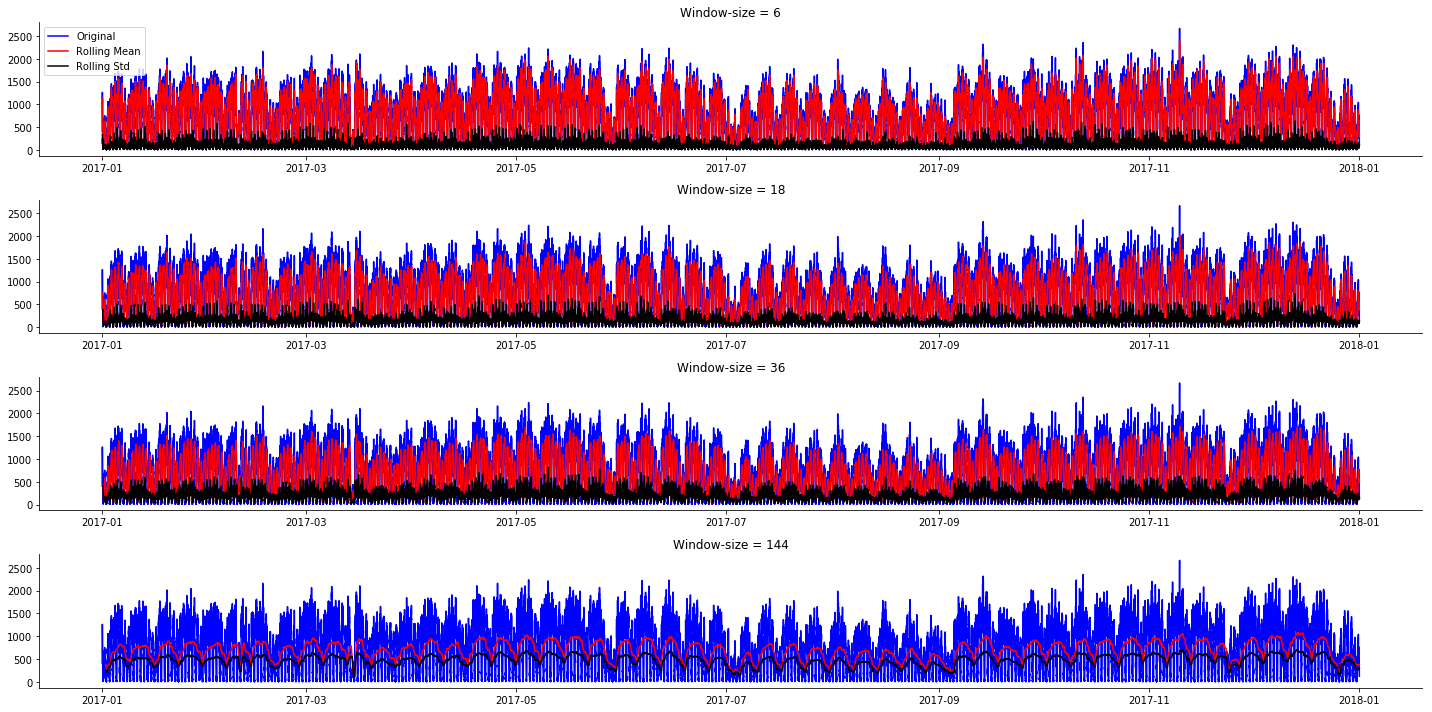

In [50]:
fig, ax = plt.subplots(4, 1, figsize=(20,10))

# 1 hour, 3 hours, 6 hours, 24 hours
for i, wsize in enumerate([6, 18, 36, 144]):
  roll_mean = loc237.fare_amount.rolling(window=wsize).mean()
  roll_std = loc237.fare_amount.rolling(window=wsize).std()
  ax[i].plot(loc237.fare_amount, color='blue', label="Original")
  ax[i].plot(roll_mean, color='red', label="Rolling Mean")
  ax[i].plot(roll_std, color='black', label="Rolling Std")
  ax[i].set_title(f"Window-size = {wsize}")
ax[0].legend(loc="best")
sns.despine()
# it adjusts the spacing
fig.tight_layout()
plt.show(block=False)

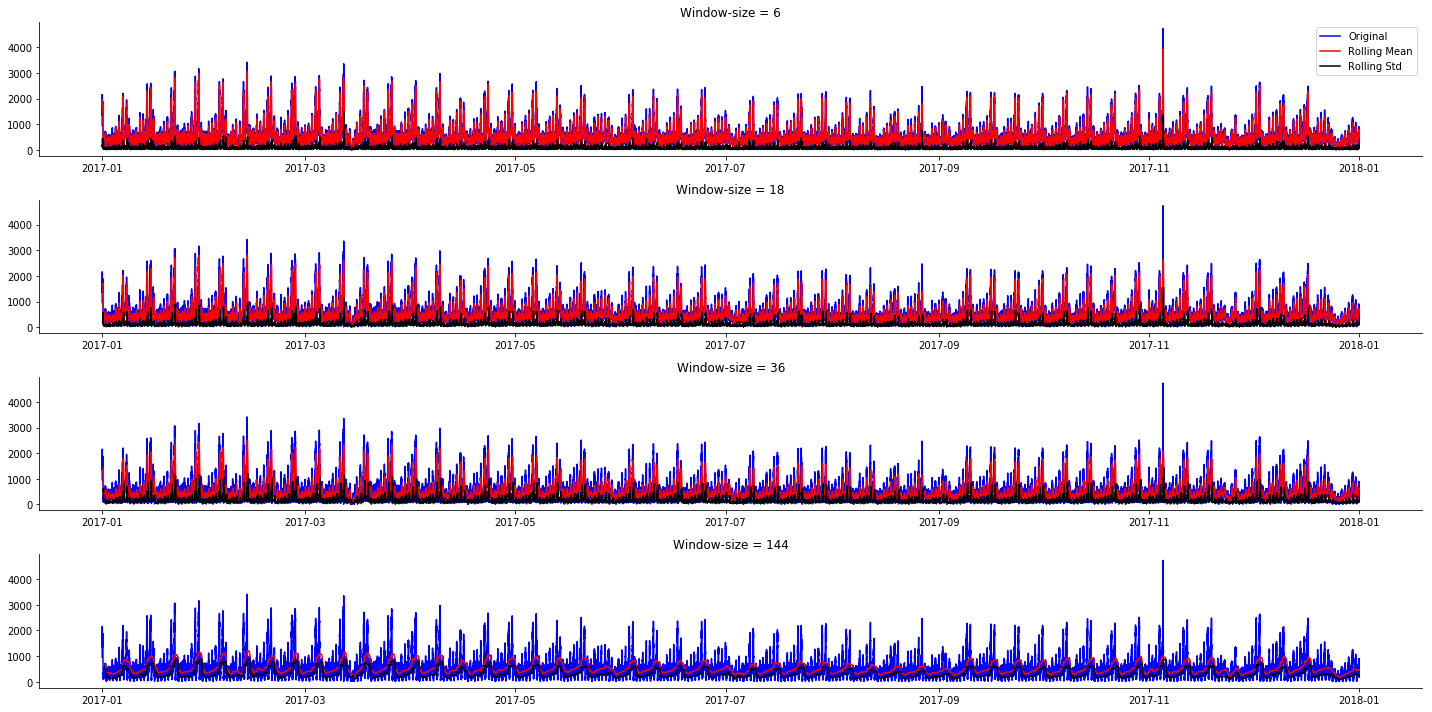

In [51]:
fig, ax = plt.subplots(4, 1, figsize=(20,10))

# 1 hour, 3 hours, 6 hours, 24 hours
for i, wsize in enumerate([6, 18, 36, 144]):
  roll_mean = loc79.fare_amount.rolling(window=wsize).mean()
  roll_std = loc79.fare_amount.rolling(window=wsize).std()
  ax[i].plot(loc79.fare_amount, color='blue', label="Original")
  ax[i].plot(roll_mean, color='red', label="Rolling Mean")
  ax[i].plot(roll_std, color='black', label="Rolling Std")
  ax[i].set_title(f"Window-size = {wsize}")
ax[0].legend(loc="best")
sns.despine()
# it adjusts the spacing
fig.tight_layout()
plt.show(block=False)

In [0]:
# daily plot with rolling statitics
def plot_daily_rolling_statistics(the_data, month, plot_mean=True, window_size=6):
    configure_plotly_browser_state()
    if(month == 2):
      num_of_days = 28
    else:
      num_of_days = 30
      
    s  = pd.date_range(f'2017-{month}-01', f'2017-{month}-{num_of_days}', freq='D').to_series()
    fig = tools.make_subplots(rows=6, cols=5, subplot_titles=s.dt.day_name().values)
    roll_mean = the_data.fare_amount.rolling(window=window_size).mean()
    roll_std = the_data.fare_amount.rolling(window=window_size).std()
    row = 1
    col = 1
    for i in range(1, num_of_days + 1):
      daily_data = the_data.loc[f"2017-{month}-{i}"]
      daily_r_mean = roll_mean.loc[f"2017-{month}-{i}"]
      daily_r_std = roll_std.loc[f"2017-{month}-{i}"]
      #o_trace = go.Scatter(x=daily_data.index, y=daily_data.fare_amount, mode="lines")
      r_mean_trace = go.Scatter(x=daily_r_mean.index, y=daily_r_mean.values, mode="lines")
      r_std_trace = go.Scatter(x=daily_r_std.index, y=daily_r_std.values, mode="lines")
      # plot either the mean or std on every grid of the subplot
      if(plot_mean == True):
        fig.append_trace(r_mean_trace, row, col)
      else:
        fig.append_trace(r_std_trace, row, col)
        
      if(col == 5):
        row += 1
        col = 1
      else:
        col +=1
    

    fig['layout'].update(xaxis=dict(
        titlefont=dict(
            family='Arial, sans-serif',
            size=3),
        showticklabels=False))
    #fig['layout']['xaxis30'].update(title='xaxis 1sdafsdsdafsdfasdfasdfsd title')
    fig['layout'].update(height=1024, width=1024, title='', showlegend=False)
    config={'scrollZoom':False,'displayModeBar':False, "showLink":False, 'showTips':False, "staticPlot":True}

    pyo.iplot(fig, filename='make-subplots-multiple-with-titles', config=config)


The rolling statistics plot shows that the mean and standard deviations vary for a window size of 1 hour(10min times 6)

In [53]:
# loc237
# daily rolling mean
plot_daily_rolling_statistics(loc237, 5, plot_mean=True, window_size=6)
# daily rolling std
plot_daily_rolling_statistics(loc237, 5, plot_mean=False, window_size=6)

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]
[ (3,1) x11,y11 ]  [ (3,2) x12,y12 ]  [ (3,3) x13,y13 ]  [ (3,4) x14,y14 ]  [ (3,5) x15,y15 ]
[ (4,1) x16,y16 ]  [ (4,2) x17,y17 ]  [ (4,3) x18,y18 ]  [ (4,4) x19,y19 ]  [ (4,5) x20,y20 ]
[ (5,1) x21,y21 ]  [ (5,2) x22,y22 ]  [ (5,3) x23,y23 ]  [ (5,4) x24,y24 ]  [ (5,5) x25,y25 ]
[ (6,1) x26,y26 ]  [ (6,2) x27,y27 ]  [ (6,3) x28,y28 ]  [ (6,4) x29,y29 ]  [ (6,5) x30,y30 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]
[ (3,1) x11,y11 ]  [ (3,2) x12,y12 ]  [ (3,3) x13,y13 ]  [ (3,4) x14,y14 ]  [ (3,5) x15,y15 ]
[ (4,1) x16,y16 ]  [ (4,2) x17,y17 ]  [ (4,3) x18,y18 ]  [ (4,4) x19,y19 ]  [ (4,5) x20,y20 ]
[ (5,1) x21,y21 ]  [ (5,2) x22,y22 ]  [ (5,3) x23,y23 ]  [ (5,4) x24,y24 ]  [ (5,5) x25,y25 ]
[ (6,1) x26,y26 ]  [ (6,2) x27,y27 ]  [ (6,3) x28,y28 ]  [ (6,4) x29,y29 ]  [ (6,5) x30,y30 ]



In [54]:
# loc79
# daily rolling mean
plot_daily_rolling_statistics(loc79, 5, plot_mean=True, window_size=6)
# daily rolling std
plot_daily_rolling_statistics(loc79, 5, plot_mean=False, window_size=6)

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]
[ (3,1) x11,y11 ]  [ (3,2) x12,y12 ]  [ (3,3) x13,y13 ]  [ (3,4) x14,y14 ]  [ (3,5) x15,y15 ]
[ (4,1) x16,y16 ]  [ (4,2) x17,y17 ]  [ (4,3) x18,y18 ]  [ (4,4) x19,y19 ]  [ (4,5) x20,y20 ]
[ (5,1) x21,y21 ]  [ (5,2) x22,y22 ]  [ (5,3) x23,y23 ]  [ (5,4) x24,y24 ]  [ (5,5) x25,y25 ]
[ (6,1) x26,y26 ]  [ (6,2) x27,y27 ]  [ (6,3) x28,y28 ]  [ (6,4) x29,y29 ]  [ (6,5) x30,y30 ]



This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]
[ (3,1) x11,y11 ]  [ (3,2) x12,y12 ]  [ (3,3) x13,y13 ]  [ (3,4) x14,y14 ]  [ (3,5) x15,y15 ]
[ (4,1) x16,y16 ]  [ (4,2) x17,y17 ]  [ (4,3) x18,y18 ]  [ (4,4) x19,y19 ]  [ (4,5) x20,y20 ]
[ (5,1) x21,y21 ]  [ (5,2) x22,y22 ]  [ (5,3) x23,y23 ]  [ (5,4) x24,y24 ]  [ (5,5) x25,y25 ]
[ (6,1) x26,y26 ]  [ (6,2) x27,y27 ]  [ (6,3) x28,y28 ]  [ (6,4) x29,y29 ]  [ (6,5) x30,y30 ]



### Tests of Stationarity: Augmented Dickey–Fuller test

In [60]:
# the whole period
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(loc237.fare_amount, autolag="AIC")
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 'p value', 'Flags used', "Number of Observations Used"])
for key, value in dftest[4].items():
  dfoutput[f"Critical value {key}"] = value
print(dfoutput)

Test Statistic                   -31.195794
p value                            0.000000
Flags used                        58.000000
Number of Observations Used    52501.000000
Critical value 1%                 -3.430475
Critical value 5%                 -2.861595
Critical value 10%                -2.566799
dtype: float64


The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). Perhaps it would be worth performing a stationary test at different time scales. Because I am interested in forecasts within 10 minutes interval.

In [0]:
# daily adcf
def perform_dicky_fuller_test(the_series):
  # Test every day
  from statsmodels.tsa.stattools import adfuller
  num_of_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
  # count how many times null hypothesis is rejected
  count_of_reject = 0
  total_count = 0
  which_months = {i:0 for i in range(1,13)}
  for month in range(1, 13):
    for day in range(1, num_of_days[month - 1] + 1):
      the_day = the_series.loc[f"2017-{month}-{day}"]
      dftest = adfuller(the_day, autolag="AIC")
      dfoutput = pd.Series(dftest[0:4], index=["Test Statistic", 'p value', 'Flags used', "Number of Observations Used"])
      total_count += 1
      if(dfoutput["p value"] < 0.05):
        which_months[month] += 1
        count_of_reject += 1
  print(count_of_reject)
  print(total_count)
  print(which_months)

In [62]:
perform_dicky_fuller_test(loc237.fare_amount)

2
365
{1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}


In [101]:
# log transform
loc237_log = np.log(loc237.fare_amount)
moving_average = loc237_log.rolling(window=6).mean().fillna(0)
# differencing
loc237_transformed= loc237_log - moving_average
perform_dicky_fuller_test(loc237_transformed)

110
365
{1: 11, 2: 15, 3: 10, 4: 5, 5: 11, 6: 9, 7: 12, 8: 8, 9: 8, 10: 8, 11: 6, 12: 7}


In [86]:
loc237_transformed

tpep_pickup_datetime
2017-01-01 00:00:00    6.006353
2017-01-01 00:10:00    6.750517
2017-01-01 00:20:00    7.119231
2017-01-01 00:30:00    7.140849
2017-01-01 00:40:00    7.130499
2017-01-01 00:50:00    0.072275
2017-01-01 01:00:00   -0.007377
2017-01-01 01:10:00   -0.133873
2017-01-01 01:20:00   -0.078878
2017-01-01 01:30:00   -0.157238
2017-01-01 01:40:00   -0.398220
2017-01-01 01:50:00   -0.318889
2017-01-01 02:00:00   -0.576288
2017-01-01 02:10:00   -0.226455
2017-01-01 02:20:00   -0.244300
2017-01-01 02:30:00   -0.574028
2017-01-01 02:40:00   -0.215967
2017-01-01 02:50:00   -0.327907
2017-01-01 03:00:00   -0.177753
2017-01-01 03:10:00   -0.372796
2017-01-01 03:20:00   -0.467559
2017-01-01 03:30:00    0.039014
2017-01-01 03:40:00   -0.546166
2017-01-01 03:50:00   -0.559528
2017-01-01 04:00:00   -0.151573
2017-01-01 04:10:00   -0.047986
2017-01-01 04:20:00   -0.362012
2017-01-01 04:30:00   -0.060369
2017-01-01 04:40:00   -0.245650
2017-01-01 04:50:00    0.174117
                   

### PACF and ACF plots

In [0]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(loc237_transformed, nlags=100)
lag_pacf = pacf(loc237_transformed, nlags=100, method='ols')


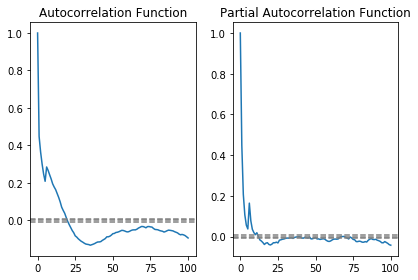

In [91]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(loc237_transformed)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(loc237_transformed)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(loc237_transformed)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(loc237_transformed)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5, 1.0, 'PACF')

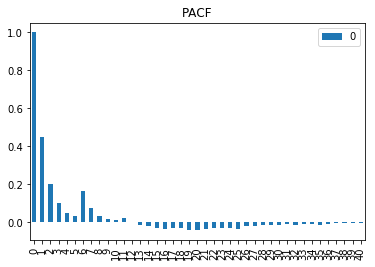

In [96]:
x_acf = pd.DataFrame(pacf(loc237_transformed))
x_acf.plot(kind='bar')
plt.title("PACF")

Text(0.5, 1.0, 'ACF')

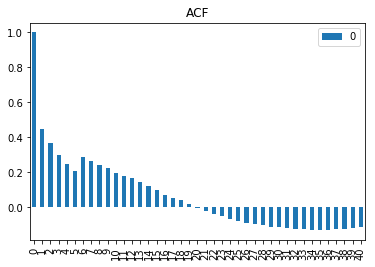

In [97]:
x_acf = pd.DataFrame(acf(loc237_transformed))
x_acf.plot(kind='bar')
plt.title("ACF")

According to the graph p is between 0 and 5 and q is between 30 and 40. These two numbers will be used for Auto-regressive and moving average components respectively

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning:

Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.



RSS:  11062.941230581862
RMSE:  0.4587833247734905


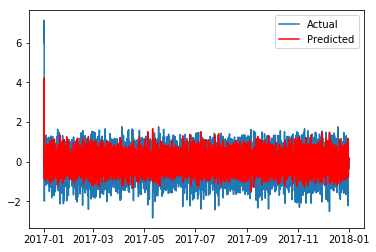

In [98]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(loc237_transformed, order=(1,1,1), freq="10min")
results = model.fit(disp=5)
plt.plot(loc237_transformed, label="Actual")
plt.plot(results.fittedvalues, color='red', label="Predicted") 
plt.legend(loc="best")
diff = (results.fittedvalues - loc237_transformed).dropna()
print("RSS: ", sum(diff ** 2))
print("RMSE: ", np.sqrt(sum(diff ** 2)/len(loc237_transformed)))

In [104]:
predictions_log_scale_diff = pd.Series(results.fittedvalues, copy=True)
predictions_log_scale_diff.head(10)

tpep_pickup_datetime
2017-01-01 00:10:00   -0.000085
2017-01-01 00:20:00   -0.301830
2017-01-01 00:30:00   -0.396184
2017-01-01 00:40:00   -0.304259
2017-01-01 00:50:00   -0.227549
2017-01-01 01:00:00    4.226820
2017-01-01 01:10:00    3.429916
2017-01-01 01:20:00    2.850330
2017-01-01 01:30:00    2.279828
2017-01-01 01:40:00    1.910922
dtype: float64

In [105]:
predictions_cum_sum = predictions_log_scale_diff.cumsum()
predictions_cum_sum.head(10)

tpep_pickup_datetime
2017-01-01 00:10:00    -0.000085
2017-01-01 00:20:00    -0.301915
2017-01-01 00:30:00    -0.698099
2017-01-01 00:40:00    -1.002358
2017-01-01 00:50:00    -1.229907
2017-01-01 01:00:00     2.996913
2017-01-01 01:10:00     6.426829
2017-01-01 01:20:00     9.277160
2017-01-01 01:30:00    11.556988
2017-01-01 01:40:00    13.467910
dtype: float64

## References


**Blogs**

https://tomaugspurger.github.io/modern-7-timeseries.html

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/

https://machinelearningmastery.com/time-series-data-stationary-python/

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387 (supports jason brownlee)



**Books**

Jason Brownlee LSTM

file:///C:/Users/Tinsae/Downloads/kupdf.net_long-short-term-memory-networks-with-python.pdf

Dr. N.D Lewis Deep Learning for Time-series

https://livebook.manning.com/#!/book/data-science-at-scale-with-python-and-dask



**Videos**

Jeffrey Yau - Time Series Forecasting using Statistical and Machine Learning Models

https://www.youtube.com/watch?v=_vQ0W_qXMxk

Udacity Course - Time Series Forecasting

https://classroom.udacity.com/courses/ud980

Edureka

https://www.youtube.com/watch?v=e8Yw4alG16Q&t=1475s

Time Series Forecasting Theory - Datamites Data Science Projects

https://www.youtube.com/watch?v=YzMV--KhI2I

Cryptocurrency-predicting RNN 

https://www.youtube.com/watch?v=ne-dpRdNReI&t=569s

Time Series Forecasting Using Recurrent Neural Network and Vector Autoregressive Model: When and How

https://www.youtube.com/watch?v=i40Road82No

About Taxis

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

https://www.tripsavvy.com/new-york-city-taxis-4026457

Tools Reference

https://towardsdatascience.com/why-every-data-scientist-should-use-dask-81b2b850e15b

https://www.kaggle.com/yuliagm/how-to-work-with-big-datasets-on-16g-ram-dask

conda install -c conda-forge dask 